# **REGRESSION PROJECT - STEEL INDUSTRY CONSUMPTION**

Target - to predict the energy consumption

# Data preprocessing :

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Steel_industry_data.csv to Steel_industry_data.csv


In [ ]:
import numpy as np
import pandas as pd
data= pd.read_csv("/content/Steel_industry_data.csv")

In [ ]:
data.shape

(35040, 11)

In [ ]:
print(data.head())

               date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.

2.understanding the data

In [ ]:
data.columns #no. of columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [ ]:
data = data.drop(['date'], axis=1)
data = data.drop(['Day_of_week'], axis=1)

In [ ]:
print(data.head())

   Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0       3.17                                  2.95   
1       4.00                                  4.46   
2       3.24                                  3.28   
3       3.31                                  3.56   
4       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  360

In [ ]:
data.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Load_Type'],
      dtype='object')

In [ ]:
data.info() #summary of DataFrame structure and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Load_Type                             35040 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 2.4+ MB


3.Checking of null values

In [ ]:
data.isna().sum() #no. of null values

Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Load_Type                               0
dtype: int64

4.Checking the shape

In [ ]:
data.shape

(35040, 9)

5.Finding out unique values for each column and counting them

In [ ]:
data.shape[1]

9

In [ ]:
for i in range(data.shape[1]):   #The for i in range(data.shape[1]): loop iterates over the columns of a DataFrame or a 2D array in Python.
  print(i)

0
1
2
3
4
5
6
7
8


In [ ]:
# Iterate over each column in the dataset and print unique values along with their value counts
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())
  print(data.iloc[:,i].value_counts())

[ 3.17  4.    3.24 ... 21.89 17.82 45.  ]
Usage_kWh
3.06      631
2.95      609
2.92      598
3.02      560
2.88      556
         ... 
130.21      1
19.33       1
23.83       1
12.78       1
45.00       1
Name: count, Length: 3343, dtype: int64
[ 2.95  4.46  3.28 ... 69.77 74.56 70.67]
Lagging_Current_Reactive.Power_kVarh
0.00     7194
4.46      208
4.82      203
4.68      202
4.75      202
         ... 
79.78       1
69.05       1
67.86       1
65.81       1
70.67       1
Name: count, Length: 1954, dtype: int64
[ 0.    0.18 15.66 16.96 21.28 19.22 16.88 22.32 18.   16.92 23.4   5.65
  4.82  6.7   4.57 12.89 23.15 16.67 16.63 23.33 16.74 16.99 18.25 22.1
 16.7  19.33 21.35 16.81 20.45 20.77 21.64 19.19 23.51 17.39 17.35  8.96
  5.47 16.24 22.57 20.74 20.88 22.54 19.55 17.42 24.26 17.75 25.2  17.5
 10.08  0.07  0.11  0.94  1.15  0.54  0.14 18.9  25.92 25.34 25.49  6.52
  1.04  0.5   1.58  0.43  1.37  0.47  3.96 12.13 23.22 25.16 26.5  26.42
 26.46 15.44  0.04 26.21 25.56 25.74  6.08  1

In [ ]:
data.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Load_Type'],
      dtype='object')

no anomalies

6.Describe

In [ ]:
data.describe()

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  35040.000000                          35040.000000   
mean      27.386892                             13.035384   
std       33.444380                             16.306000   
min        0.000000                              0.000000   
25%        3.200000                              2.300000   
50%        4.570000                              5.000000   
75%       51.237500                             22.640000   
max      157.180000                             96.910000   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          35040.000000  35040.000000   
mean                               3.870949      0.011524   
std                                7.424463      0.016151   
min                                0.000000      0.000000   
25%                                0.000000      0.000000   
50%                                0.000000      0.000000   
75%                                2.090000      0.020000   
max                               27.760000      0.070000   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
count                  35040.000000                  35040.000000   
mean                      80.578056                     84.367870   
std                       18.921322                     30.456535   
min                        0.000000                      0.000000   
25%                       63.320000                     99.700000   
50%                       87.960000                    100.000000   
75%                       99.022500                    100.000000   
max                      100.000000                    100.000000   

                NSM  
count  35040.000000  
mean   42750.000000  
std    24940.534317  
min        0.000000  
25%    21375.000000  
50%    42750.000000  
75%    64125.000000  
max    85500.000000

7.Converting categorical into numercial variables

One-Hot encoding

In [ ]:
# List of categorical columns
categorical_columns = ['WeekStatus', 'Load_Type']

# Apply dummy variable encoding (one-hot encoding with drop_first=True)
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Convert 'yes' and 'no' to 1 and 0
cols_to_convert = data_encoded.columns.difference(['CO2(tCO2)','Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh','Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor'])
data_encoded[cols_to_convert] = data_encoded[cols_to_convert].replace({'yes': 1, 'no': 0})

# Convert only relevant boolean or object columns to integers
cols_to_convert = data_encoded.columns.difference(['CO2(tCO2)','Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh','Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor'])
data_encoded[cols_to_convert] = data_encoded[cols_to_convert].astype(int)

# Display the first few rows of the dummy variable encoded dataset
print(data_encoded.head())

   Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0       3.17                                  2.95   
1       4.00                                  4.46   
2       3.24                                  3.28   
3       3.31                                  3.56   
4       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  360

In [ ]:
for i in range(data_encoded.shape[1]):
  print(data_encoded.iloc[:,i].unique())
  print(data_encoded.iloc[:,i].value_counts())

[ 3.17  4.    3.24 ... 21.89 17.82 45.  ]
Usage_kWh
3.06      631
2.95      609
2.92      598
3.02      560
2.88      556
         ... 
130.21      1
19.33       1
23.83       1
12.78       1
45.00       1
Name: count, Length: 3343, dtype: int64
[ 2.95  4.46  3.28 ... 69.77 74.56 70.67]
Lagging_Current_Reactive.Power_kVarh
0.00     7194
4.46      208
4.82      203
4.68      202
4.75      202
         ... 
79.78       1
69.05       1
67.86       1
65.81       1
70.67       1
Name: count, Length: 1954, dtype: int64
[ 0.    0.18 15.66 16.96 21.28 19.22 16.88 22.32 18.   16.92 23.4   5.65
  4.82  6.7   4.57 12.89 23.15 16.67 16.63 23.33 16.74 16.99 18.25 22.1
 16.7  19.33 21.35 16.81 20.45 20.77 21.64 19.19 23.51 17.39 17.35  8.96
  5.47 16.24 22.57 20.74 20.88 22.54 19.55 17.42 24.26 17.75 25.2  17.5
 10.08  0.07  0.11  0.94  1.15  0.54  0.14 18.9  25.92 25.34 25.49  6.52
  1.04  0.5   1.58  0.43  1.37  0.47  3.96 12.13 23.22 25.16 26.5  26.42
 26.46 15.44  0.04 26.21 25.56 25.74  6.08  1

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus_Weekend                    35040 non-null  int64  
 8   Load_Type_Maximum_Load                35040 non-null  int64  
 9   Load_Type_Medium_Load                 35040 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.7 MB


In [ ]:
data_encoded.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus_Weekend', 'Load_Type_Maximum_Load',
       'Load_Type_Medium_Load'],
      dtype='object')

In [ ]:
data_encoded.shape

(35040, 10)

Independent and dependent :

In [ ]:
X=data_encoded.drop(['Usage_kWh'],axis=1)

print(X)
y = data_encoded['Usage_kWh']
print(y)

       Lagging_Current_Reactive.Power_kVarh  \
0                                      2.95   
1                                      4.46   
2                                      3.28   
3                                      3.56   
4                                      4.50   
...                                     ...   
35035                                  4.86   
35036                                  3.74   
35037                                  3.17   
35038                                  3.06   
35039                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                      0.00        0.0   
1                                      0.00        0.0   
2                                      0.00        0.0   
3                                      0.00        0.0   
4                                      0.00        0.0   
...                                     ...        ...   
35035                        

# *EDA*

Heatmap for checking the coorelations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Heatmap : : Heatmaps are used to highlight areas of interest or intensity within a dataset. They are particularly useful for identifying trends, correlations, and outliers.

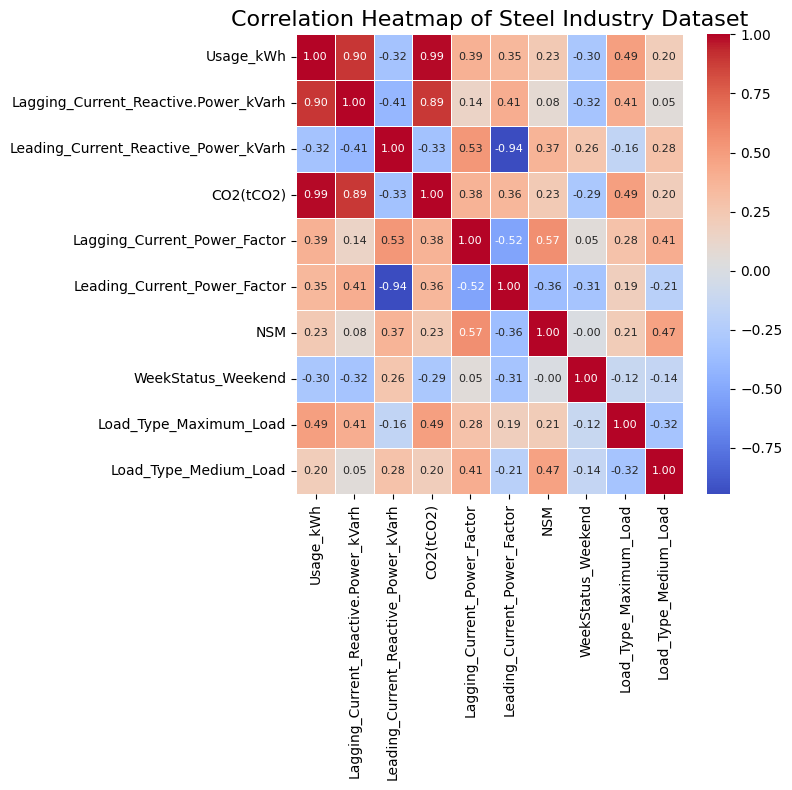

In [ ]:
# Calculate the correlation matrix
corr_matrix = data_encoded.corr()

# Set a larger plot size
plt.figure(figsize=(8, 8))
# Create the heatmap with smaller annotation font size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 8})
#heatmap - coorelation by using an heatmap
#annot=True: Annotates each cell with the correlation coefficient.
#cmap='coolwarm': Uses the ‘coolwarm’ colormap to color the heatmap.
#fmt='.2f': Formats the annotation text to two decimal places.
#linewidths=0.5: Sets the width of the lines that divide the cells.
#annot_kws={"size": 8}: Sets the font size of the annotations to 8


# Add a title with increased font size for better visibility
plt.title('Correlation Heatmap of Steel Industry Dataset', fontsize=16)

# Show the plot with tight layout for better spacing
plt.tight_layout()   #Adjusts the padding between and around subplots to minimize overlap and improve spacing.
plt.show()


Color Scale:
Red Shades: Positive correlation (closer to +1). This means that as one variable increases, the other tends to increase as well.
Blue Shades: Negative correlation (closer to -1). This indicates that as one variable increases, the other tends to decrease.
White/Light Shades: Weak or no correlation (around 0).

---



Box plot : A box plot (also known as a box-and-whisker plot) is a graphical representation used to display the distribution of a dataset. It provides a visual summary of several important aspects of the data, including its central tendency, variability, and skewness.

<Axes: xlabel='Usage_kWh'>

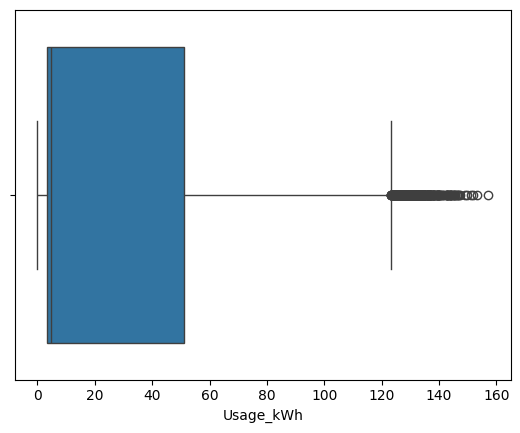

In [ ]:
sns.boxplot(x=data_encoded['Usage_kWh'])

This boxplot shows the distribution of the Usage_kWh variable. Here’s how to interpret it:

Box: Represents the interquartile range (IQR), which contains the middle 50% of the data. The lower boundary of the box is the 25th percentile, and the upper boundary is the 75th percentile.
Line inside the box: Represents the median (50th percentile) value of Usage_kWh.
Whiskers: Extend from the box to show the range of data within 1.5 times the IQR.
Outliers: The circles beyond the whiskers represent outliers, values that are significantly higher than the rest of the data (beyond the upper whisker).
In this plot, most values of Usage_kWh are clustered between 0 and 60, while several outliers exist beyond 120 kWh, indicating higher usage in a few cases. This suggests a positively skewed distribution.

---



Plots

histograms : A histogram is a graphical representation of the distribution of numerical data. It uses bars to show the frequency of data points within specified ranges (bins).

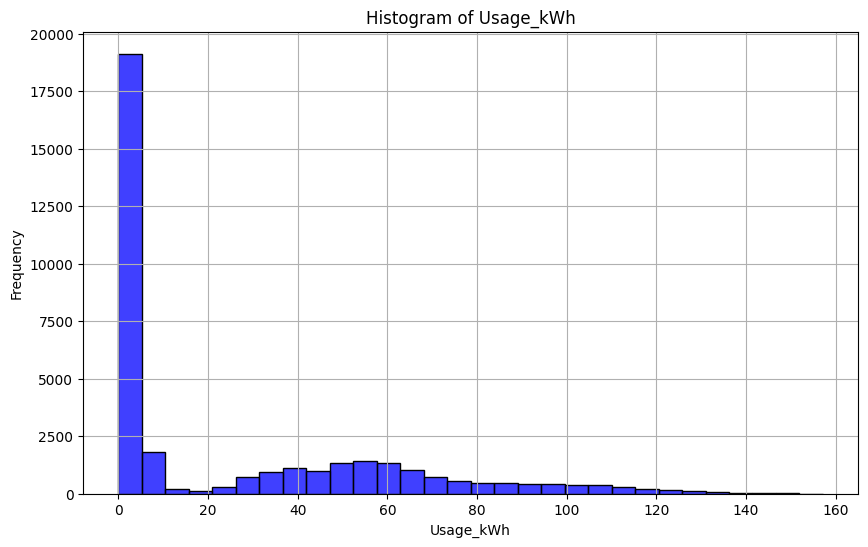

In [ ]:
# create the histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=False, color='blue')
#bins parameter specifies the number of bins (intervals) into which the data is divided.
#kde=False means that the Kernel Density Estimate plot will not be included in the histogram.
plt.xlabel('Usage_kWh')
plt.ylabel('Frequency')
plt.title(f'Histogram of Usage_kWh')
plt.grid(True)
plt.show()



1. **X-axis (Usage_kWh)**: This represents the range of energy usage in kilowatt-hours (kWh). The values start from 0 and go beyond 80 kWh.

2. **Y-axis (Frequency)**: This indicates how often each range of kWh usage occurs. The frequency counts the number of occurrences for each energy usage bin.

3. **Distribution**:
   - There is a very high frequency of energy usage values near 0 kWh, with a steep drop-off after.
   - After the initial peak around 0 kWh, the frequency of values spreads out and becomes relatively uniform but at much lower frequencies between 10 and 80 kWh.
   - The histogram shows that a large portion of the data represents very low energy usage (close to 0), while higher usage values occur less frequently.

4. **Interpretation**:
   - The data is skewed to the right, meaning that most users or cases have low energy usage (close to 0), while only a few have much higher energy usage.
   - This distribution may indicate that a large number of customers or entities use very little energy, but a smaller group consumes much more.


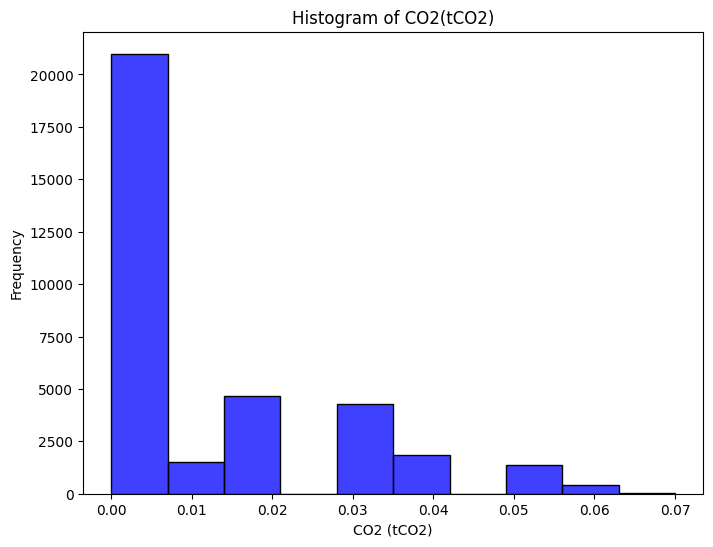

In [ ]:
# Assuming your dataset is stored in 'df'
plt.figure(figsize=(8, 6))
sns.histplot(data_encoded['CO2(tCO2)'], kde=False, bins=10, color='blue')
plt.title('Histogram of CO2(tCO2)')
plt.xlabel('CO2 (tCO2)')
plt.ylabel('Frequency')
plt.show()

Axes:
The horizontal axis (x-axis) is labeled “CO2 (tCO2)” and ranges from 0.0 to 0.07 in increments of 0.01.
The vertical axis (y-axis) is labeled “Frequency” and ranges from 0 to 20000.
Bars:
There are five bars representing different frequencies for corresponding ranges of CO2 values.
The first bar, representing the range from 0.00 to just before 0.01, has the highest frequency, reaching up to between 17500 and 20000.
The remaining bars show significantly lower frequencies, with each subsequent bar being shorter than the previous one.
This histogram likely represents the distribution of carbon dioxide emissions measured in tons (tCO2). The high frequency of the first bar suggests that most of the data points fall within the lowest range of CO2 emissions.

---



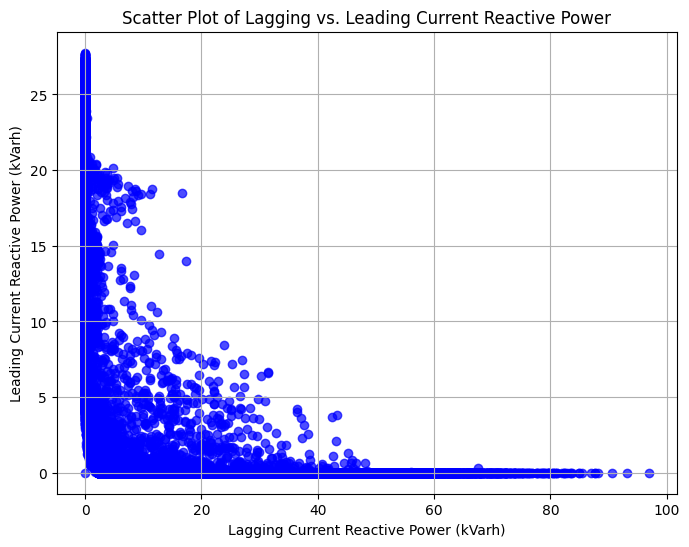

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Lagging_Current_Reactive.Power_kVarh'], #Fixed typo in the column name from "Lagging_Current_Reactive_Power_kVarh"
            data['Leading_Current_Reactive_Power_kVarh'],
            color='blue',
            alpha=0.7)

# Add titles and labels
plt.title('Scatter Plot of Lagging vs. Leading Current Reactive Power')
plt.xlabel('Lagging Current Reactive Power (kVarh)')
plt.ylabel('Leading Current Reactive Power (kVarh)')
plt.grid(True)

# Show the plot
plt.show()

Most of the data points are concentrated near the lower range of both variables, especially when the Lagging Current Reactive Power is below 20 kVarh.
There is a visible trend that as Lagging Current Reactive Power increases, Leading Current Reactive Power tends to decrease.
The highest values of Leading Current Reactive Power seem to occur when Lagging Current Reactive Power is very small, close to 0.
Insight: The scatter plot shows a negatively correlated pattern between the two types of reactive power. As the Lagging Current Reactive Power increases, the Leading Current Reactive Power decreases, forming a downward curve.

---



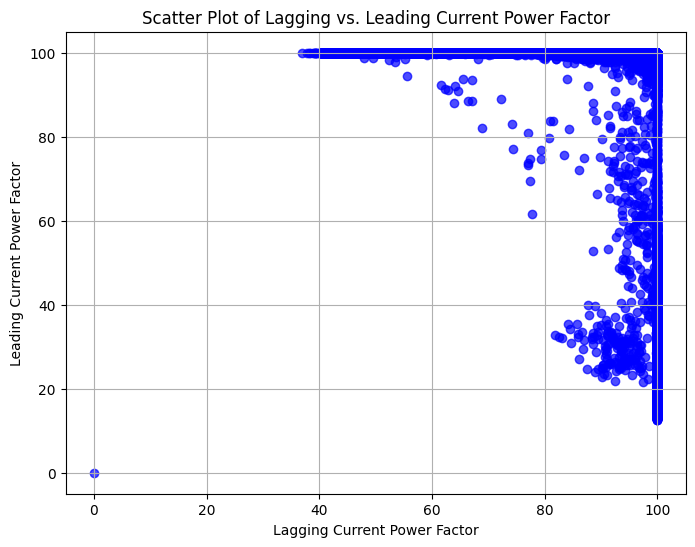

In [ ]:
# Plotting the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(data['Lagging_Current_Power_Factor'], data['Leading_Current_Power_Factor'], color='blue', alpha=0.7)

# Adding title and labels
plt.title('Scatter Plot of Lagging vs. Leading Current Power Factor')
plt.xlabel('Lagging Current Power Factor')
plt.ylabel('Leading Current Power Factor')

# Displaying the plot
plt.grid(True)
plt.show()

There is a dense concentration of points at the upper right corner (around 100 on the y-axis and close to 100 on the x-axis). This suggests that in your data, both the lagging and leading power factors are often high.
There's a pattern where for lower values of lagging current power factor, the leading current power factor tends to stay high (close to 100).
At lower x-axis values (low lagging power factor), some points show low values for both factors (close to 0 on both axes).
The scatter plot overall shows a nonlinear pattern, with a steep drop-off in leading power factor as lagging current power factor increases.

Pie-chart : A pie chart is a circular graph divided into slices to illustrate numerical proportions.

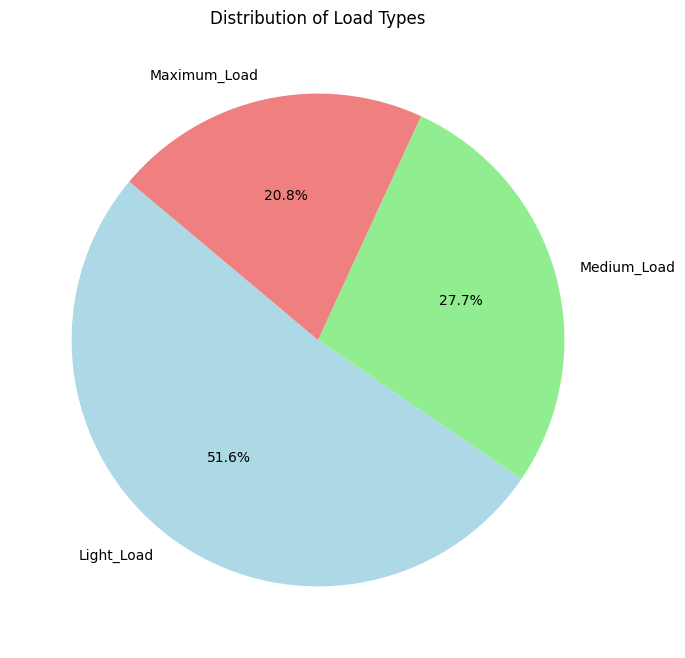

In [ ]:
# Count the occurrences of each Load_Type
load_counts = data['Load_Type'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(load_counts, labels=load_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])

# Add a title
plt.title('Distribution of Load Types')

# Show the plot
plt.show()

light_load is more than other two.

---



bar chart : A bar chart (or bar graph) is a type of data visualization used to represent and compare discrete categories or groups of data.

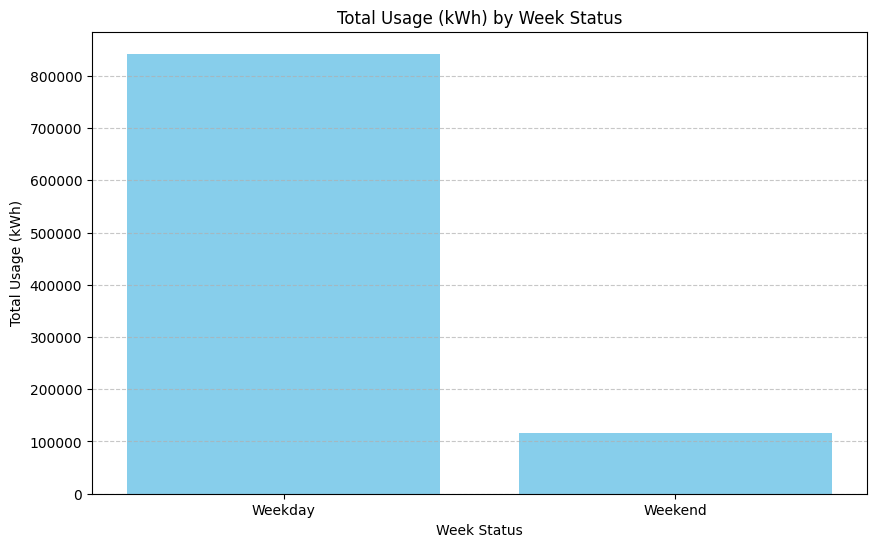

In [ ]:
# Compute the total Usage_kwh for each WeekStatus
total_usage = data.groupby('WeekStatus')['Usage_kWh'].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_usage.index, total_usage.values, color='skyblue')

# Add titles and labels
plt.title('Total Usage (kWh) by Week Status')
plt.xlabel('Week Status')
plt.ylabel('Total Usage (kWh)')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# splitting in different ratios

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.40, train_size=0.60 , random_state=1)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.25, train_size=0.75 , random_state=1)

In [ ]:
X=data_encoded.drop(['Usage_kWh'],axis=1)
y = data_encoded['Usage_kWh']

# Algorithms

# Linear Regression before feature selection

In [ ]:
# imports
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [ ]:
#70 - 30

lm2 = LinearRegression()
lm2.fit(X_train1, y_train1)
y_pred1 = lm2.predict(X_test1)
print(np.sqrt(metrics.mean_absolute_error(y_test1, y_pred1)))

1.6024151506252082


In [ ]:
#evaluarion metric
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.9832672446990494

In [ ]:
#80 -20

lm2 = LinearRegression()
lm2.fit(X_train2, y_train2)
y_pred2 = lm2.predict(X_test2)
print(np.sqrt(metrics.mean_absolute_error(y_test2, y_pred2)))

1.5944718970054215


In [ ]:
#evaluarion metric
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

0.9820819794200195

In [ ]:
#60 - 40

lm2 = LinearRegression()
lm2.fit(X_train3, y_train3)
y_pred3 = lm2.predict(X_test3)
print(np.sqrt(metrics.mean_absolute_error(y_test3, y_pred3)))

1.604594840438917


In [ ]:
#evaluarion metric
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

0.982944012933529

In [ ]:
#25 - 75

lm2 = LinearRegression()
lm2.fit(X_train4, y_train4)
y_pred4 = lm2.predict(X_test4)
print(np.sqrt(metrics.mean_absolute_error(y_test4, y_pred4)))

1.5917545732363456


In [ ]:
#evaluarion metric
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

0.9831195564824637

best MSE among the linear regression is 4.3220685892318915 for 70-30 ratio

---



# Knn before the feature selection

70 - 30 Ratio

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model=KNeighborsRegressor(n_neighbors=5)

In [ ]:
model.fit(X_train1, y_train1)

KNeighborsRegressor()

In [ ]:
y_pred1 = model.predict(X_test1)
y_pred1

array([3.888, 3.874, 3.636, ..., 3.89 , 5.016, 3.904])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
knn

Predicted  Actual
5760       3.888    3.20
14294      3.874    3.78
35035      3.636    3.85
30292     47.700   43.81
31651     64.568   65.34
...          ...     ...
32301     53.560   58.10
10215     60.114   62.24
7005       3.890    3.96
10638      5.016    4.90
22794      3.904    5.33

[10512 rows x 2 columns]

In [ ]:
#evaluarion metric
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.981859390094929

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

1.8363369482496195

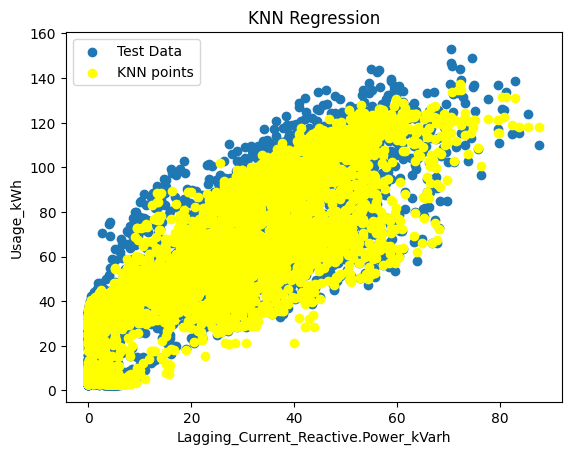

In [ ]:
plt.scatter(X_test1['Lagging_Current_Reactive.Power_kVarh'], y_test1, label='Test Data')
plt.scatter(X_test1['Lagging_Current_Reactive.Power_kVarh'], y_pred1, color='yellow', linewidth=1, label='KNN points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('KNN Regression')
plt.legend()
plt.show()

60 - 40 ratio

In [ ]:
model=KNeighborsRegressor(n_neighbors=5)

In [ ]:
model.fit(X_train3, y_train3)

KNeighborsRegressor()

In [ ]:
y_pred3 = model.predict(X_test3)
y_pred3

array([4.112, 3.902, 3.658, ..., 3.156, 4.558, 4.378])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
knn

Predicted  Actual
5760       4.112    3.20
14294      3.902    3.78
35035      3.658    3.85
30292     48.586   43.81
31651     64.568   65.34
...          ...     ...
16680      3.398    3.35
26222      2.860    2.63
14102      3.156    3.17
30001      4.558    4.82
31402      4.378    3.56

[14016 rows x 2 columns]

In [ ]:
#evaluation metric
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

0.979316596006018

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

1.9855960331050229

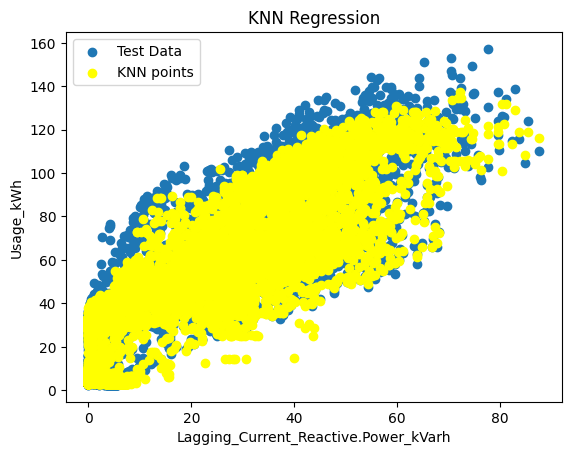

In [ ]:
plt.scatter(X_test3['Lagging_Current_Reactive.Power_kVarh'], y_test3, label='Test Data')
plt.scatter(X_test3['Lagging_Current_Reactive.Power_kVarh'], y_pred3, color='yellow', linewidth=1, label='KNN points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('KNN Regression')
plt.legend()
plt.show()

80 - 20 ratio

In [ ]:
model=KNeighborsRegressor(n_neighbors=5)

In [ ]:
model.fit(X_train2, y_train2)

KNeighborsRegressor()

In [ ]:
y_pred2 = model.predict(X_test2)
y_pred2

array([ 3.888,  3.874,  3.636, ...,  3.636, 58.448,  3.352])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
knn

Predicted  Actual
5760       3.888    3.20
14294      3.874    3.78
35035      3.636    3.85
30292     47.700   43.81
31651     64.568   65.34
...          ...     ...
6873     106.948   96.62
25118     47.686   40.61
6907       3.636    3.85
6185      58.448   60.80
27936      3.352    3.60

[7008 rows x 2 columns]

In [ ]:
#evaluarion metric
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

0.9835244886370782

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

1.700305079908676

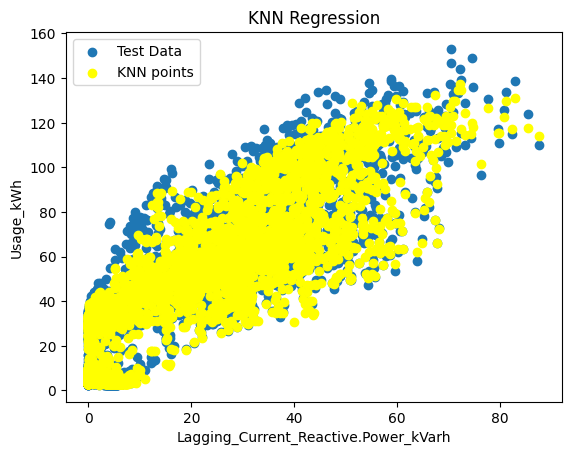

In [ ]:
plt.scatter(X_test2['Lagging_Current_Reactive.Power_kVarh'], y_test2, label='Test Data')
plt.scatter(X_test2['Lagging_Current_Reactive.Power_kVarh'], y_pred2, color='yellow', linewidth=1, label='KNN points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('KNN Regression')
plt.legend()
plt.show()

75 - 25 ratio

In [ ]:
model=KNeighborsRegressor(n_neighbors=5)

In [ ]:
model.fit(X_train4, y_train4)

KNeighborsRegressor()

In [ ]:
y_pred4 = model.predict(X_test4)
y_pred4

array([ 3.888,  3.874,  3.636, ...,  3.062,  4.32 , 66.15 ])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
knn

Predicted  Actual
5760       3.888    3.20
14294      3.874    3.78
35035      3.636    3.85
30292     47.700   43.81
31651     64.568   65.34
...          ...     ...
21676     74.844   75.89
322      108.620  108.29
13257      3.062    3.06
33596      4.320    4.82
2170      66.150   63.68

[8760 rows x 2 columns]

In [ ]:
#evaluation metric
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

0.9828986924606837

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

1.7666365296803652

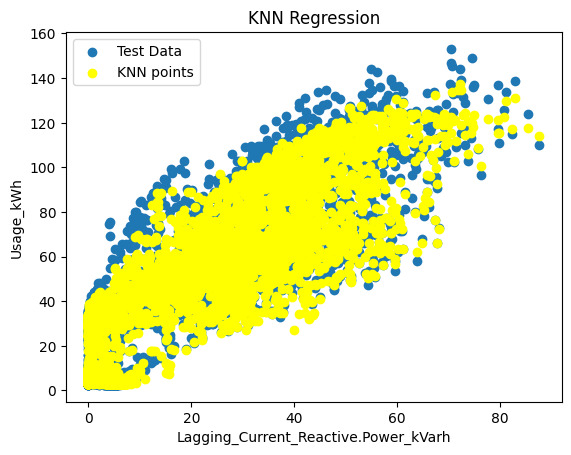

In [ ]:
plt.scatter(X_test4['Lagging_Current_Reactive.Power_kVarh'], y_test4, label='Test Data')
plt.scatter(X_test4['Lagging_Current_Reactive.Power_kVarh'], y_pred4, color='yellow', linewidth=1, label='KNN points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('KNN Regression')
plt.legend()
plt.show()



---



# SVM Before the feature selection

70 - 30 ratio

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='rbf')

In [ ]:
model.fit(X_train1, y_train1)

SVR()

In [ ]:
y_pred1 = model.predict(X_test1)
y_pred1

array([ 5.59112244, 12.39636655,  3.05005709, ..., -0.36030282,
       28.12271563, 35.48718502])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
svm

Predicted  Actual
5760    5.591122    3.20
14294  12.396367    3.78
35035   3.050057    3.85
30292  47.265328   43.81
31651  45.006457   65.34
...          ...     ...
32301  39.806597   58.10
10215  30.838333   62.24
7005   -0.360303    3.96
10638  28.122716    4.90
22794  35.487185    5.33

[10512 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.2726758720886666

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

19.350823673657654

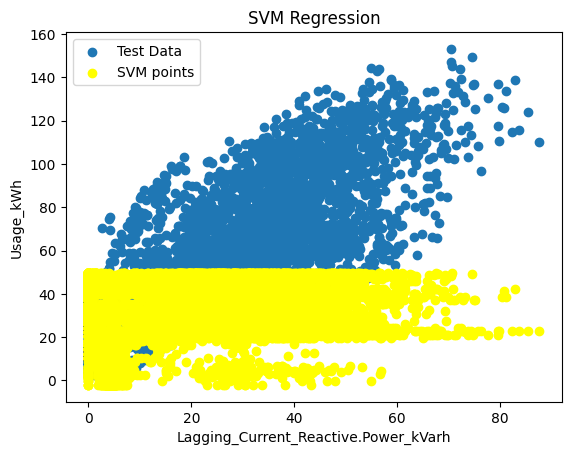

In [ ]:
plt.scatter(X_test1['Lagging_Current_Reactive.Power_kVarh'], y_test1, label='Test Data')
plt.scatter(X_test1['Lagging_Current_Reactive.Power_kVarh'], y_pred1, color='yellow', linewidth=1, label='SVM points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('SVM Regression')
plt.legend()
plt.show()

60 - 40 split

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='rbf')

In [ ]:
model.fit(X_train3, y_train3)

SVR()

In [ ]:
y_pred3 = model.predict(X_test3)
y_pred3

array([ 5.52684371, 12.5956583 ,  3.16027553, ..., 12.59599704,
       44.21718222,  1.82904608])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
svm

Predicted  Actual
5760    5.526844    3.20
14294  12.595658    3.78
35035   3.160276    3.85
30292  46.885735   43.81
31651  44.837057   65.34
...          ...     ...
16680  38.482458    3.35
26222   2.211464    2.63
14102  12.595997    3.17
30001  44.217182    4.82
31402   1.829046    3.56

[14016 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

0.27204678206658617

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

19.379545988032785

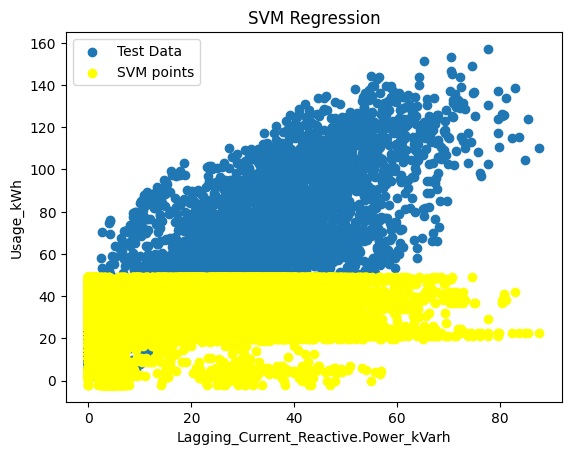

In [ ]:
plt.scatter(X_test3['Lagging_Current_Reactive.Power_kVarh'], y_test3, label='Test Data')
plt.scatter(X_test3['Lagging_Current_Reactive.Power_kVarh'], y_pred3, color='yellow', linewidth=1, label='SVM points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('SVM Regression')
plt.legend()
plt.show()

80 - 20 ratio

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='rbf')

In [ ]:
model.fit(X_train2, y_train2)

SVR()

In [ ]:
y_pred2 = model.predict(X_test2)
y_pred2

array([ 5.62130369, 12.31043532,  3.13983645, ...,  3.13983626,
       34.3816291 ,  5.62081157])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
svm

Predicted  Actual
5760    5.621304    3.20
14294  12.310435    3.78
35035   3.139836    3.85
30292  47.788763   43.81
31651  45.221262   65.34
...          ...     ...
6873   50.021232   96.62
25118  49.156347   40.61
6907    3.139836    3.85
6185   34.381629   60.80
27936   5.620812    3.60

[7008 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

0.26376564566770433

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

19.498446499450562

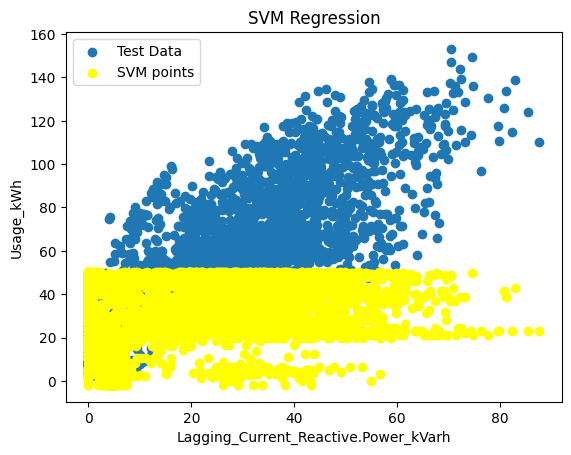

In [ ]:
plt.scatter(X_test2['Lagging_Current_Reactive.Power_kVarh'], y_test2, label='Test Data')
plt.scatter(X_test2['Lagging_Current_Reactive.Power_kVarh'], y_pred2, color='yellow', linewidth=1, label='SVM points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('SVM Regression')
plt.legend()
plt.show()

75 - 25 ratio

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='rbf')

In [ ]:
model.fit(X_train4, y_train4)

SVR()

In [ ]:
y_pred4 = model.predict(X_test4)
y_pred4

array([ 5.6195231 , 12.34365029,  3.10867574, ...,  1.95262989,
        1.40309844, 49.84050724])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
svm

Predicted  Actual
5760    5.619523    3.20
14294  12.343650    3.78
35035   3.108676    3.85
30292  47.529818   43.81
31651  45.064825   65.34
...          ...     ...
21676  31.777499   75.89
322    22.967667  108.29
13257   1.952630    3.06
33596   1.403098    4.82
2170   49.840507   63.68

[8760 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

0.27129684441152313

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

19.380152269312358

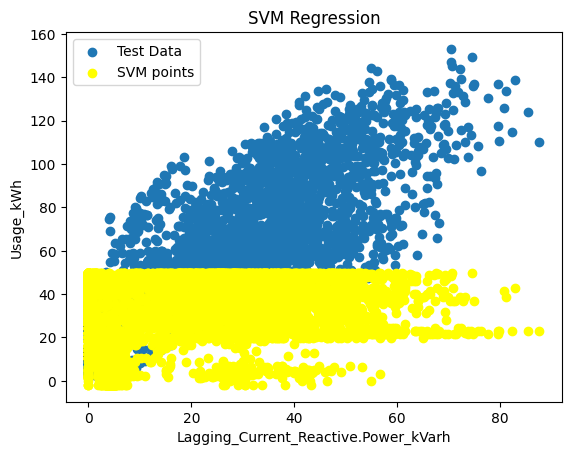

In [ ]:
plt.scatter(X_test4['Lagging_Current_Reactive.Power_kVarh'], y_test4, label='Test Data')
plt.scatter(X_test4['Lagging_Current_Reactive.Power_kVarh'], y_pred4, color='yellow', linewidth=1, label='SVM points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('SVM Regression')
plt.legend()
plt.show()



---



# Decision tree before the splitting

70 - 30 ratio

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [ ]:
clf = DecisionTreeRegressor()

# Train Decision Tree Classifer
clf = clf.fit(X_train1,y_train1)

In [ ]:
y_pred1 = clf.predict(X_test1)
y_pred1

array([3.2 , 3.78, 3.82, ..., 3.96, 4.97, 5.33])

In [ ]:
dr = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
dr

Predicted  Actual
5760        3.20    3.20
14294       3.78    3.78
35035       3.82    3.85
30292      49.64   43.81
31651      66.31   65.34
...          ...     ...
32301      58.54   58.10
10215      63.54   62.24
7005        3.96    3.96
10638       4.97    4.90
22794       5.33    5.33

[10512 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.9983517328917512

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

0.5188984018264841

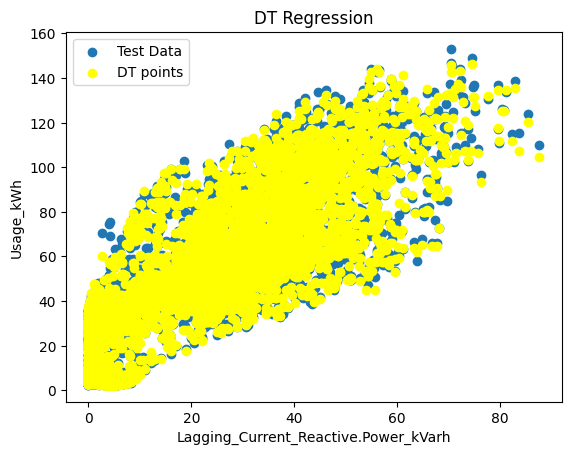

In [ ]:
plt.scatter(X_test1['Lagging_Current_Reactive.Power_kVarh'], y_test1, label='Test Data')
plt.scatter(X_test1['Lagging_Current_Reactive.Power_kVarh'], y_pred1, color='yellow', linewidth=1, label='DT points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('DT Regression')
plt.legend()
plt.show()

60 - 40 ratio

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
clf = DecisionTreeRegressor()

# Train Decision Tree Classifer
clf = clf.fit(X_train3,y_train3)

In [ ]:
y_pred3 = clf.predict(X_test3)
y_pred3

array([3.28, 3.78, 3.82, ..., 3.2 , 4.82, 3.53])

In [ ]:
dr = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
dr

Predicted  Actual
5760        3.28    3.20
14294       3.78    3.78
35035       3.82    3.85
30292      45.79   43.81
31651      66.53   65.34
...          ...     ...
16680       3.38    3.35
26222       2.63    2.63
14102       3.20    3.17
30001       4.82    4.82
31402       3.53    3.56

[14016 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

0.9976323287135992

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

0.5839561929223744

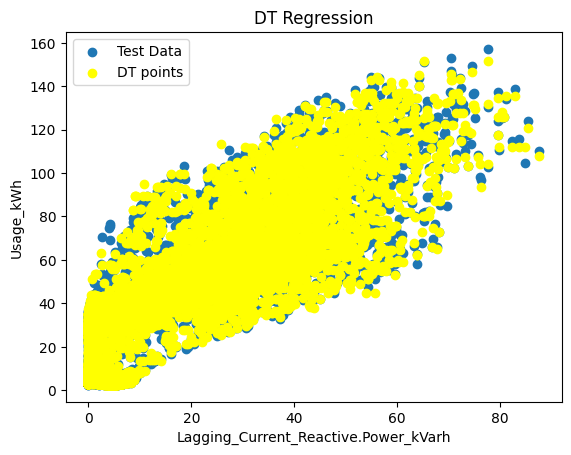

In [ ]:
plt.scatter(X_test3['Lagging_Current_Reactive.Power_kVarh'], y_test3, label='Test Data')
plt.scatter(X_test3['Lagging_Current_Reactive.Power_kVarh'], y_pred3, color='yellow', linewidth=1, label='DT points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('DT Regression')
plt.legend()
plt.show()

80 - 20 ratio

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
clf = DecisionTreeRegressor()

# Train Decision Tree Classifer
clf = clf.fit(X_train2,y_train2)

In [ ]:
y_pred2 = clf.predict(X_test2)
y_pred2

array([ 3.2 ,  3.78,  3.82, ...,  3.85, 61.13,  3.6 ])

In [ ]:
dr = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
dr

Predicted  Actual
5760        3.20    3.20
14294       3.78    3.78
35035       3.82    3.85
30292      44.68   43.81
31651      66.89   65.34
...          ...     ...
6873       96.23   96.62
25118      41.26   40.61
6907        3.85    3.85
6185       61.13   60.80
27936       3.60    3.60

[7008 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

0.9986481663434955

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

0.48423373287671234

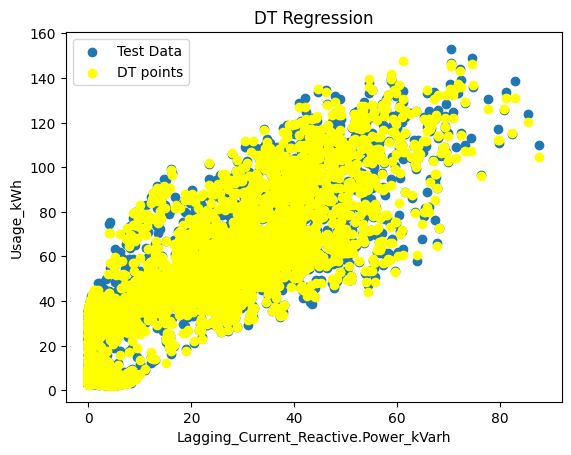

In [ ]:
plt.scatter(X_test2['Lagging_Current_Reactive.Power_kVarh'], y_test2, label='Test Data')
plt.scatter(X_test2['Lagging_Current_Reactive.Power_kVarh'], y_pred2, color='yellow', linewidth=1, label='DT points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('DT Regression')
plt.legend()
plt.show()

75- 25 ratio

In [ ]:
clf = DecisionTreeRegressor()

# Train Decision Tree Classifer
clf = clf.fit(X_train4,y_train4)

In [ ]:
y_pred4 = clf.predict(X_test4)
y_pred4

array([ 3.2 ,  3.78,  3.89, ...,  3.06,  5.22, 63.9 ])

In [ ]:
dr = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
dr

Predicted  Actual
5760        3.20    3.20
14294       3.78    3.78
35035       3.89    3.85
30292      49.64   43.81
31651      66.53   65.34
...          ...     ...
21676      75.67   75.89
322       106.49  108.29
13257       3.06    3.06
33596       5.22    4.82
2170       63.90   63.68

[8760 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

0.9986141212452518

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

0.4957340182648402

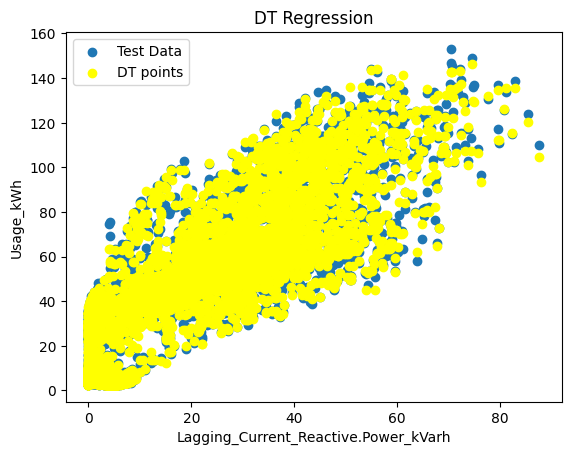

In [ ]:
plt.scatter(X_test4['Lagging_Current_Reactive.Power_kVarh'], y_test4, label='Test Data')
plt.scatter(X_test4['Lagging_Current_Reactive.Power_kVarh'], y_pred4, color='yellow', linewidth=1, label='DT points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('DT Regression')
plt.legend()
plt.show()



---



# Bagging before the feature selection

70 - 30 ratio

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train1, y_train1)

RandomForestRegressor()

In [ ]:
y_pred1 = rf.predict(X_test1)
y_pred1

array([3.2053, 3.7739, 3.8314, ..., 3.9536, 4.9343, 5.3429])

In [ ]:
r = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
r

Predicted  Actual
5760      3.2053    3.20
14294     3.7739    3.78
35035     3.8314    3.85
30292    44.5048   43.81
31651    65.4484   65.34
...          ...     ...
32301    57.9613   58.10
10215    62.3746   62.24
7005      3.9536    3.96
10638     4.9343    4.90
22794     5.3429    5.33

[10512 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.999164923679201

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

0.3244233066971081

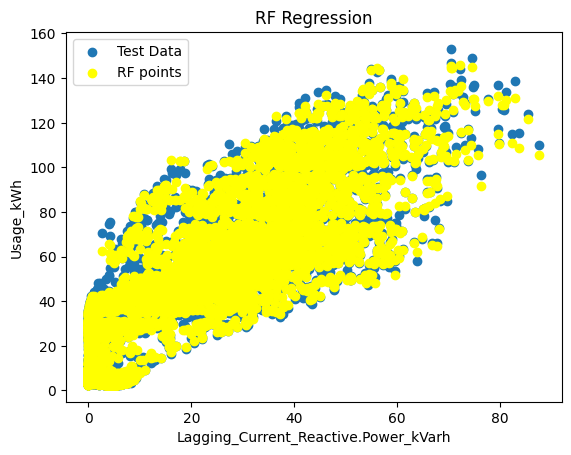

In [ ]:
plt.scatter(X_test1['Lagging_Current_Reactive.Power_kVarh'], y_test1, label='Test Data')
plt.scatter(X_test1['Lagging_Current_Reactive.Power_kVarh'], y_pred1, color='yellow', linewidth=1, label='RF points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('RF Regression')
plt.legend()
plt.show()

60 - 40 ratio

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train3, y_train3)

RandomForestRegressor()

In [ ]:
y_pred3 = rf.predict(X_test3)
y_pred3

array([3.2131, 3.7734, 3.8274, ..., 3.1676, 4.7904, 3.5561])

In [ ]:
r = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
r

Predicted  Actual
5760      3.2131    3.20
14294     3.7734    3.78
35035     3.8274    3.85
30292    44.4782   43.81
31651    65.3700   65.34
...          ...     ...
16680     3.3843    3.35
26222     2.6297    2.63
14102     3.1676    3.17
30001     4.7904    4.82
31402     3.5561    3.56

[14016 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

0.9990789093591446

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

0.34964714611872133

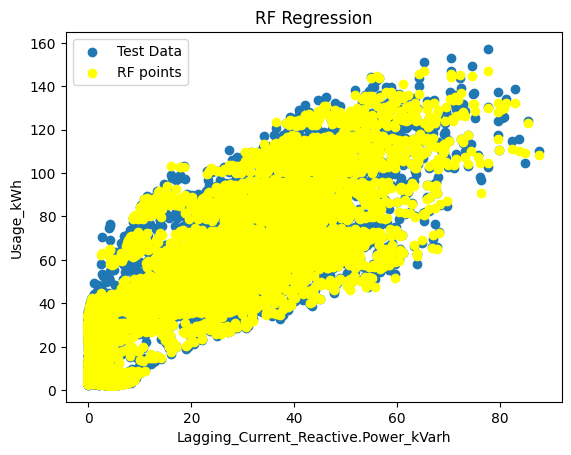

In [ ]:
plt.scatter(X_test3['Lagging_Current_Reactive.Power_kVarh'], y_test3, label='Test Data')
plt.scatter(X_test3['Lagging_Current_Reactive.Power_kVarh'], y_pred3, color='yellow', linewidth=1, label='RF points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('RF Regression')
plt.legend()
plt.show()

80 - 20 ratio

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train2, y_train2)

RandomForestRegressor()

In [ ]:
y_pred2 = rf.predict(X_test2)
y_pred2

array([ 3.2157,  3.779 ,  3.8329, ...,  3.8422, 60.5501,  3.606 ])

In [ ]:
r = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
r

Predicted  Actual
5760      3.2157    3.20
14294     3.7790    3.78
35035     3.8329    3.85
30292    43.7230   43.81
31651    65.6485   65.34
...          ...     ...
6873     95.1131   96.62
25118    40.6272   40.61
6907      3.8422    3.85
6185     60.5501   60.80
27936     3.6060    3.60

[7008 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

0.9991403206668075

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

0.30530285388127815

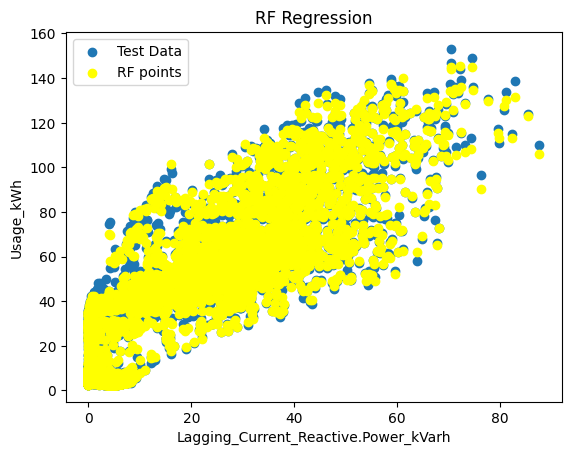

In [ ]:
plt.scatter(X_test2['Lagging_Current_Reactive.Power_kVarh'], y_test2, label='Test Data')
plt.scatter(X_test2['Lagging_Current_Reactive.Power_kVarh'], y_pred2, color='yellow', linewidth=1, label='RF points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('RF Regression')
plt.legend()
plt.show()

75 - 25 ratio

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train4, y_train4)

RandomForestRegressor()

In [ ]:
y_pred4 = rf.predict(X_test4)
y_pred4

array([ 3.2168,  3.7712,  3.8366, ...,  3.0641,  4.7725, 63.5615])

In [ ]:
r = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
r

Predicted  Actual
5760      3.2168    3.20
14294     3.7712    3.78
35035     3.8366    3.85
30292    44.2941   43.81
31651    65.6161   65.34
...          ...     ...
21676    75.1710   75.89
322     106.2176  108.29
13257     3.0641    3.06
33596     4.7725    4.82
2170     63.5615   63.68

[8760 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

0.9992358249915325

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

0.30992082191780784

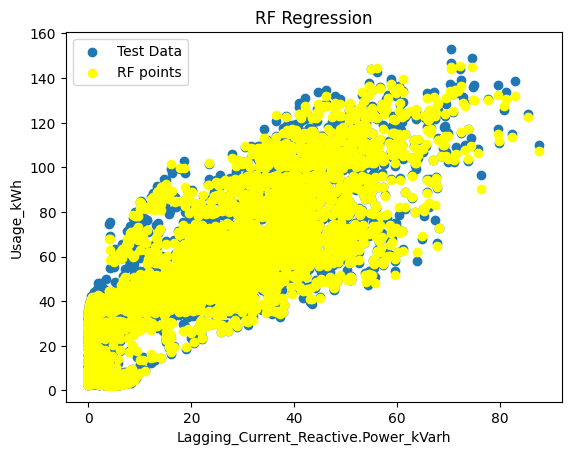

In [ ]:
plt.scatter(X_test4['Lagging_Current_Reactive.Power_kVarh'], y_test4, label='Test Data')
plt.scatter(X_test4['Lagging_Current_Reactive.Power_kVarh'], y_pred4, color='yellow', linewidth=1, label='RF points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('RF Regression')
plt.legend()
plt.show()



---



# Boosting before the feature selection

XG **boost**
70 - 30 ratio

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBRegressor()

train_model = model.fit(X_train1, y_train1)

In [ ]:
y_pred1 = train_model.predict(X_test1)
y_pred1

array([3.2505913, 4.0345516, 3.4650652, ..., 3.8175178, 4.951982 ,
       5.1443043], dtype=float32)

In [ ]:
xg = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
xg

Predicted  Actual
5760    3.250591    3.20
14294   4.034552    3.78
35035   3.465065    3.85
30292  41.796921   43.81
31651  65.548927   65.34
...          ...     ...
32301  58.166668   58.10
10215  62.766281   62.24
7005    3.817518    3.96
10638   4.951982    4.90
22794   5.144304    5.33

[10512 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.9990195746151693

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

0.48032607259997134

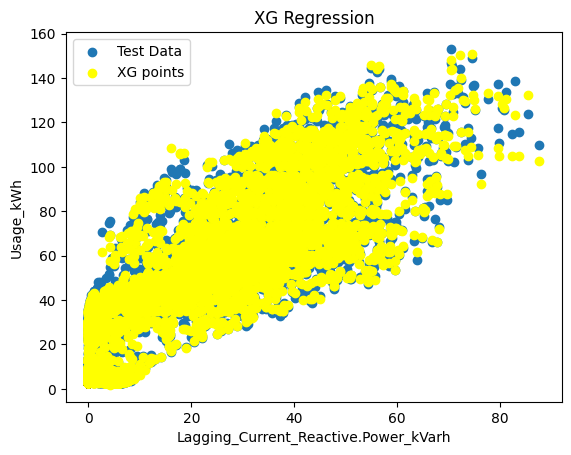

In [ ]:
plt.scatter(X_test1['Lagging_Current_Reactive.Power_kVarh'], y_test1, label='Test Data')
plt.scatter(X_test1['Lagging_Current_Reactive.Power_kVarh'], y_pred1, color='yellow', linewidth=1, label='XG points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('XG Regression')
plt.legend()
plt.show()

60 - 40 ratio

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBRegressor()

train_model = model.fit(X_train3, y_train3)

In [ ]:
y_pred3 = model.predict(X_test3)
y_pred3

array([3.2423844, 3.9005365, 3.965286 , ..., 3.2738283, 4.8260126,
       3.4904957], dtype=float32)

In [ ]:
xg = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
xg

Predicted  Actual
5760    3.242384    3.20
14294   3.900537    3.78
35035   3.965286    3.85
30292  43.673515   43.81
31651  66.157188   65.34
...          ...     ...
16680   3.204319    3.35
26222   2.688401    2.63
14102   3.273828    3.17
30001   4.826013    4.82
31402   3.490496    3.56

[14016 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

0.9990038890242188

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

0.4795042435668375

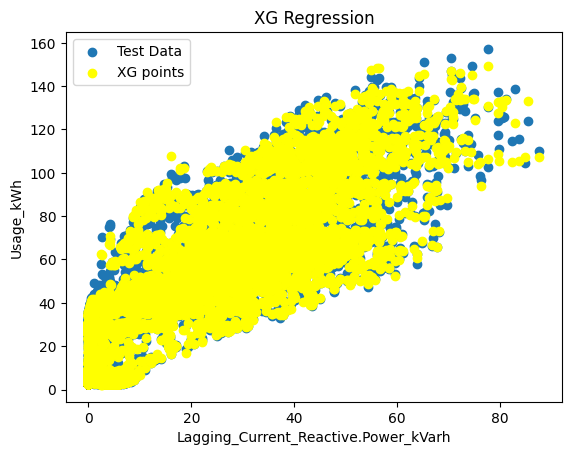

In [ ]:
plt.scatter(X_test3['Lagging_Current_Reactive.Power_kVarh'], y_test3, label='Test Data')
plt.scatter(X_test3['Lagging_Current_Reactive.Power_kVarh'], y_pred3, color='yellow', linewidth=1, label='XG points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('XG Regression')
plt.legend()
plt.show()

80 - 20 ratio

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBRegressor()

model = model.fit(X_train2, y_train2)

In [ ]:
y_pred2 = model.predict(X_test2)
y_pred2

array([ 3.2716484,  3.9575837,  3.894053 , ...,  4.065467 , 60.712994 ,
        3.5214088], dtype=float32)

In [ ]:
xg = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
xg

Predicted  Actual
5760    3.271648    3.20
14294   3.957584    3.78
35035   3.894053    3.85
30292  43.308262   43.81
31651  66.185661   65.34
...          ...     ...
6873   96.205467   96.62
25118  39.985817   40.61
6907    4.065467    3.85
6185   60.712994   60.80
27936   3.521409    3.60

[7008 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

0.9990479311274819

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

0.4726915609686887

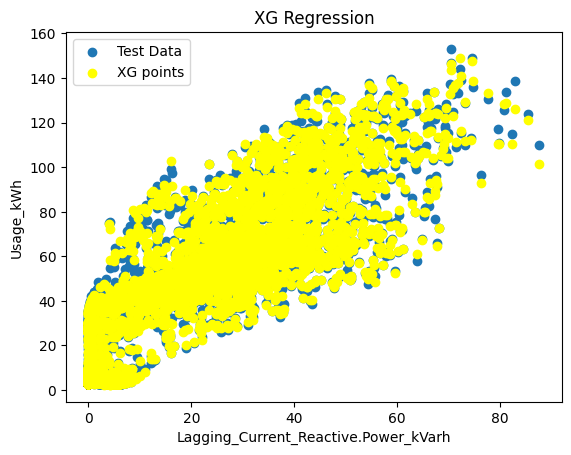

In [ ]:
plt.scatter(X_test2['Lagging_Current_Reactive.Power_kVarh'], y_test2, label='Test Data')
plt.scatter(X_test2['Lagging_Current_Reactive.Power_kVarh'], y_pred2, color='yellow', linewidth=1, label='XG points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('XG Regression')
plt.legend()
plt.show()

75 - 25 ratio

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBRegressor()

model = model.fit(X_train4, y_train4)

In [ ]:
y_pred4 = train_model.predict(X_test4)
y_pred4

array([ 3.2423844,  3.9005365,  3.965286 , ...,  2.97199  ,  4.434008 ,
       63.376995 ], dtype=float32)

In [ ]:
xg = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
xg

Predicted  Actual
5760     3.242384    3.20
14294    3.900537    3.78
35035    3.965286    3.85
30292   43.673515   43.81
31651   66.157188   65.34
...           ...     ...
21676   75.733208   75.89
322    104.225861  108.29
13257    2.971990    3.06
33596    4.434008    4.82
2170    63.376995   63.68

[8760 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

0.9990508658321744

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

0.47341260654958955

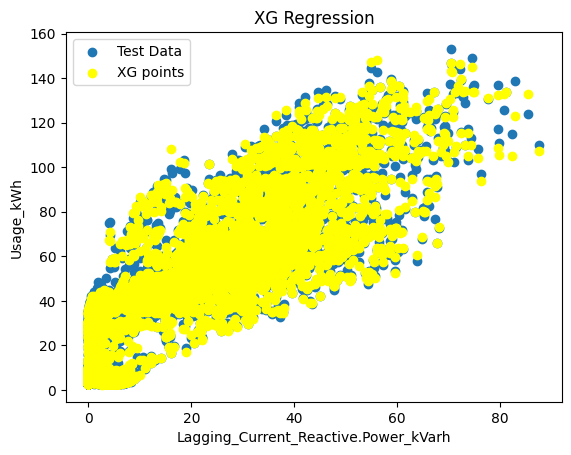

In [ ]:
plt.scatter(X_test4['Lagging_Current_Reactive.Power_kVarh'], y_test4, label='Test Data')
plt.scatter(X_test4['Lagging_Current_Reactive.Power_kVarh'], y_pred4, color='yellow', linewidth=1, label='XG points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('XG Regression')
plt.legend()
plt.show()

## ADA boost

70 - 30 ratio

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize the AdaBoost classifier
model = AdaBoostRegressor(n_estimators=50, random_state=42)

# Fit the model on the training data
model.fit(X_train1, y_train1)

# Predict on the test data
y_pred1 = model.predict(X_test1)

In [ ]:
ab = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
ab

Predicted  Actual
5760    8.853814    3.20
14294   8.853814    3.78
35035  12.083785    3.85
30292  48.325194   43.81
31651  63.867373   65.34
...          ...     ...
32301  63.817834   58.10
10215  63.817834   62.24
7005   12.083785    3.96
10638   8.853814    4.90
22794   8.853814    5.33

[10512 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.9595932754780265

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

6.008528524048208

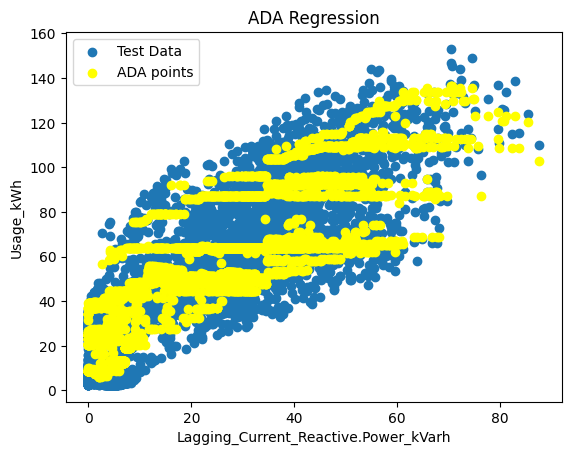

In [ ]:
plt.scatter(X_test1['Lagging_Current_Reactive.Power_kVarh'], y_test1, label='Test Data')
plt.scatter(X_test1['Lagging_Current_Reactive.Power_kVarh'], y_pred1, color='yellow', linewidth=1, label='ADA points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('ADA Regression')
plt.legend()
plt.show()

60 - 40 ratio

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
# Initialize the AdaBoost classifier
model = AdaBoostRegressor(n_estimators=50, random_state=42)

# Fit the model on the training data
model.fit(X_train3, y_train3)

# Predict on the test data
y_pred3 = model.predict(X_test3)

In [ ]:
ab = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
ab

Predicted  Actual
5760    7.748143    3.20
14294   8.326474    3.78
35035   9.980491    3.85
30292  46.335319   43.81
31651  64.058405   65.34
...          ...     ...
16680   8.326474    3.35
26222   9.980491    2.63
14102   8.292927    3.17
30001   8.326474    4.82
31402   7.748143    3.56

[14016 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

0.970908904009025

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

5.116293716893252

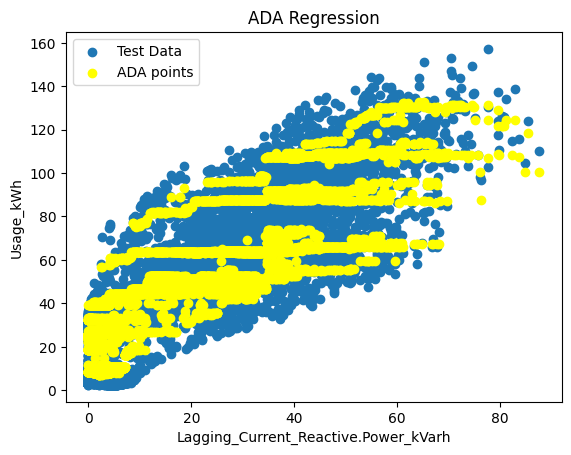

In [ ]:
plt.scatter(X_test3['Lagging_Current_Reactive.Power_kVarh'], y_test3, label='Test Data')
plt.scatter(X_test3['Lagging_Current_Reactive.Power_kVarh'], y_pred3, color='yellow', linewidth=1, label='ADA points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('ADA Regression')
plt.legend()
plt.show()

80 - 20 RATIO

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize the AdaBoost classifier
model = AdaBoostRegressor(n_estimators=50, random_state=42)

# Fit the model on the training data
model.fit(X_train2, y_train2)

# Predict on the test data
y_pred2 = model.predict(X_test2)

In [ ]:
ab = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
ab

Predicted  Actual
5760    7.320088    3.20
14294   9.111282    3.78
35035  12.775261    3.85
30292  45.165145   43.81
31651  64.118077   65.34
...          ...     ...
6873   93.752015   96.62
25118  48.185693   40.61
6907   16.626167    3.85
6185   64.016231   60.80
27936  12.775261    3.60

[7008 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

0.9604984076320926

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

5.811076859251792

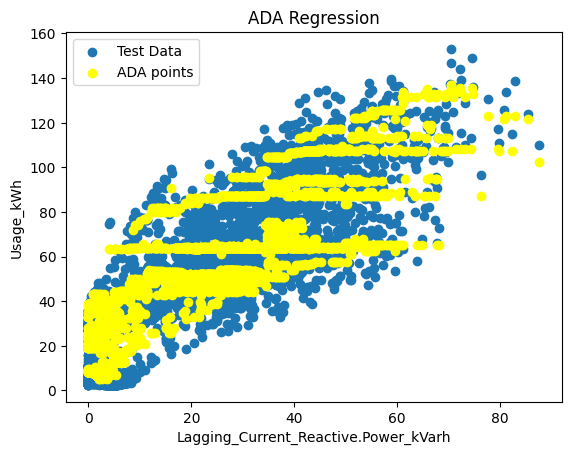

In [ ]:
plt.scatter(X_test2['Lagging_Current_Reactive.Power_kVarh'], y_test2, label='Test Data')
plt.scatter(X_test2['Lagging_Current_Reactive.Power_kVarh'], y_pred2, color='yellow', linewidth=1, label='ADA points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('ADA Regression')
plt.legend()
plt.show()

75 - 25 ratio

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize the AdaBoost classifier
model = AdaBoostRegressor(n_estimators=50, random_state=42)

# Fit the model on the training data
model.fit(X_train4, y_train4)

# Predict on the test data
y_pred4 = model.predict(X_test4)

In [ ]:
ab = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
ab

Predicted  Actual
5760     7.761318    3.20
14294   11.449677    3.78
35035    7.761318    3.85
30292   46.135916   43.81
31651   64.034023   65.34
...           ...     ...
21676   64.719815   75.89
322    109.158233  108.29
13257    7.761318    3.06
33596    7.761318    4.82
2170    63.857854   63.68

[8760 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

0.9705327361286364

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

5.1338118525859295

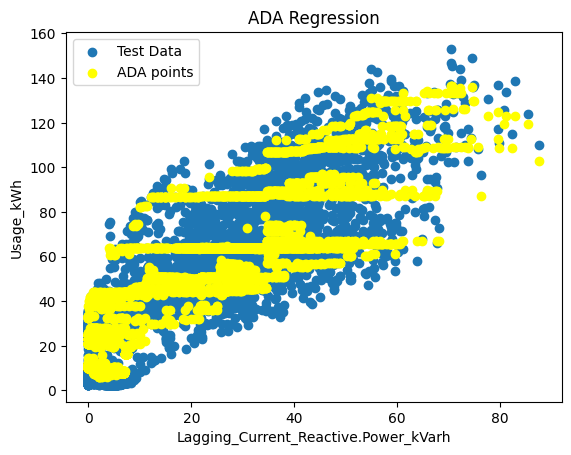

In [ ]:
plt.scatter(X_test4['Lagging_Current_Reactive.Power_kVarh'], y_test4, label='Test Data')
plt.scatter(X_test4['Lagging_Current_Reactive.Power_kVarh'], y_pred4, color='yellow', linewidth=1, label='ADA points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('ADA Regression')
plt.legend()
plt.show()



---



# Ann before split

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

70 - 30 ratio

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(18),

                            tf.keras.layers.Dense(15),
 tf.keras.layers.Dense(12),
                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)

])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train1, y_train1, epochs= 50, verbose=1)

Epoch 1/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2127.6895 - mae: 2127.6895
Epoch 2/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 207.6272 - mae: 207.6272
Epoch 3/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 162.5043 - mae: 162.5043
Epoch 4/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 151.3151 - mae: 151.3151
Epoch 5/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 134.3928 - mae: 134.3928
Epoch 6/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 119.5317 - mae: 119.5317
Epoch 7/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 91.8541 - mae: 91.8541
Epoch 8/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 77.4411 - mae: 77.4411
Epoch 9/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 70.4863 - mae: 70.4863
Epoch 10/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48.6713 - mae: 48.6713
Epoch 11/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 40.8253 - mae: 40.8253
Epoch 12/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 36.9703 - 

In [ ]:
model.evaluate(X_test1, y_test1)

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.6153 - mae: 7.6153


[7.6728515625, 7.6728515625]

In [ ]:
y_pred1 = model.predict(X_test1)
y_pred1 = y_pred1.flatten()

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test1, y_pred1)
print(f'R² Score: {r2}')

R² Score: 0.8635913007591117


In [ ]:
ann = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
ann

Predicted  Actual
5760    3.584916    3.20
14294   9.570083    3.78
35035  10.801683    3.85
30292  40.644230   43.81
31651  56.609299   65.34
...          ...     ...
32301  46.893517   58.10
10215  50.836338   62.24
7005   11.231072    3.96
10638   5.334527    4.90
22794   6.330588    5.33

[10512 rows x 2 columns]

In [ ]:
model.summary();

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 18)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             285 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,282 (8.92 KB)

 Trainable params: 760 (2.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,522 (5.95 KB)

Text(0.5, 0, 'epochs')

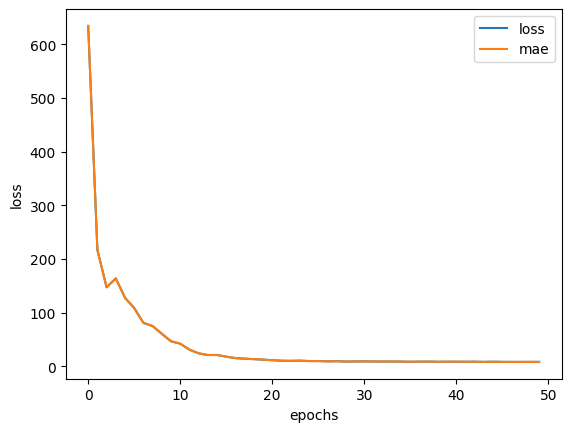

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

60- 40 RATIO

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([




                            tf.keras.layers.Dense(18),

                            tf.keras.layers.Dense(15),


 tf.keras.layers.Dense(12),



                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)

])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train3, y_train3, epochs= 50, verbose=1)

Epoch 1/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 293.7325 - mae: 293.7325
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 201.3287 - mae: 201.3287
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 155.8139 - mae: 155.8139
Epoch 4/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 112.5180 - mae: 112.5180
Epoch 5/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 103.8202 - mae: 103.8202
Epoch 6/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 94.0213 - mae: 94.0213
Epoch 7/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 61.6845 - mae: 61.6845
Epoch 8/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 74.9370 - mae: 74.9370
Epoch 9/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 57.5981 - mae: 57.5981
Epoch 10/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 50.9765 - mae: 50.9765
Epoch 11/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 51.7112 - mae: 51.7112
Epoch 12/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 45.9009 - mae:

In [ ]:
model.evaluate(X_test3, y_test3)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11.0206 - mae: 11.0206


[11.039339065551758, 11.039339065551758]

In [ ]:
y_pred3 = model.predict(X_test3)
y_pred3 = y_pred3.flatten()

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test3, y_pred3)
print(f'R² Score: {r2}')

R² Score: 0.770103949230321


In [ ]:
ann = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
ann

Predicted  Actual
5760    4.100521    3.20
14294  -7.307943    3.78
35035  -6.367931    3.85
30292  34.806274   43.81
31651  50.689121   65.34
...          ...     ...
16680  -1.302985    3.35
26222  -0.209422    2.63
14102  -8.426489    3.17
30001  -2.426068    4.82
31402   2.733657    3.56

[14016 rows x 2 columns]

In [ ]:
model.summary();

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (32, 18)                    │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (32, 15)                    │             285 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (32, 12)                    │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (32, 6)                     │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (32, 3)                     │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (32, 1)                     │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,282 (8.92 KB)

 Trainable params: 760 (2.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,522 (5.95 KB)

Text(0.5, 0, 'epochs')

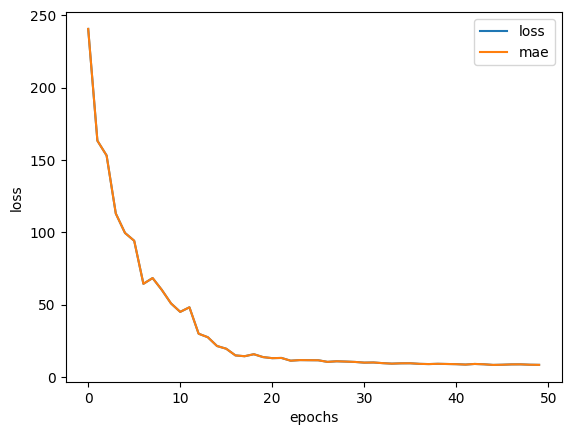

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

80-20 ratio

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([




                            tf.keras.layers.Dense(18),

                            tf.keras.layers.Dense(15),


 tf.keras.layers.Dense(12),



                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)

])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train2, y_train2, epochs= 50, verbose=1)

Epoch 1/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 391.4638 - mae: 391.4638
Epoch 2/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 60.2018 - mae: 60.2018
Epoch 3/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 48.2362 - mae: 48.2362
Epoch 4/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 30.9449 - mae: 30.9449
Epoch 5/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 28.3156 - mae: 28.3156
Epoch 6/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 24.7386 - mae: 24.7386
Epoch 7/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 18.5875 - mae: 18.5875
Epoch 8/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 17.2208 - mae: 17.2208
Epoch 9/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.8316 - mae: 14.8316
Epoch 10/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.8550 - mae: 14.8550
Epoch 11/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 13.7234 - mae: 13.7234
Epoch 12/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 12.6046 - mae: 12.6046

In [ ]:
model.evaluate(X_test2, y_test2)

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5296 - mae: 7.5296


[7.483237266540527, 7.483237266540527]

In [ ]:
y_pred2 = model.predict(X_test2)
y_pred2 = y_pred2.flatten()

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test2, y_pred2)
print(f'R² Score: {r2}')

R² Score: 0.8691510880781019


In [ ]:
ann = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
ann

Predicted  Actual
5760     4.309904    3.20
14294    8.028456    3.78
35035    8.336866    3.85
30292   43.034779   43.81
31651   60.603642   65.34
...           ...     ...
6873   102.810814   96.62
25118   42.626381   40.61
6907    12.436279    3.85
6185    46.593788   60.80
27936    4.882128    3.60

[7008 rows x 2 columns]

In [ ]:
model.summary();

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (32, 18)                    │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (32, 15)                    │             285 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (32, 12)                    │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (32, 6)                     │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (32, 3)                     │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (32, 1)                     │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,282 (8.92 KB)

 Trainable params: 760 (2.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,522 (5.95 KB)

Text(0.5, 0, 'epochs')

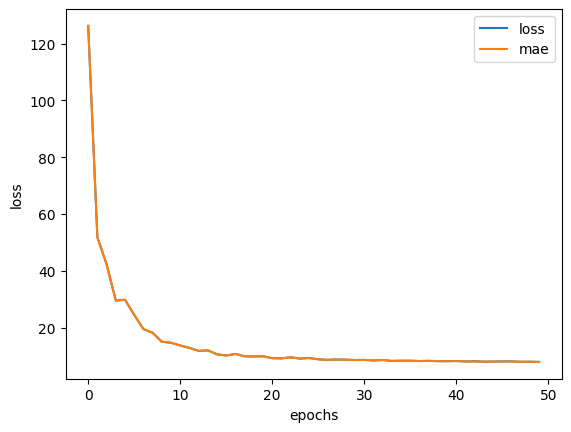

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

75 - 25 ratio

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([




                            tf.keras.layers.Dense(18),

                            tf.keras.layers.Dense(15),


 tf.keras.layers.Dense(12),



                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)

])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train4, y_train4, epochs= 50, verbose=1)

Epoch 1/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 539.2050 - mae: 539.2050
Epoch 2/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 167.3555 - mae: 167.3555
Epoch 3/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 111.6993 - mae: 111.6993
Epoch 4/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 87.5047 - mae: 87.5047
Epoch 5/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 76.6851 - mae: 76.6851
Epoch 6/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 52.4758 - mae: 52.4758
Epoch 7/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47.9087 - mae: 47.9087
Epoch 8/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 35.8629 - mae: 35.8629
Epoch 9/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 29.3797 - mae: 29.3797
Epoch 10/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 22.4511 - mae: 22.4511
Epoch 11/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 20.3901 - mae: 20.3901
Epoch 12/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.9293 - mae: 16.

In [ ]:
model.evaluate(X_test4, y_test4)

274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.7345 - mae: 8.7345


[8.662307739257812, 8.662307739257812]

In [ ]:
y_pred4 = model.predict(X_test4)
y_pred4 = y_pred4.flatten()

274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test4, y_pred4)
print(f'R² Score: {r2}')

R² Score: 0.8680433463874937


In [ ]:
ann = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
ann

Predicted  Actual
5760     3.830467    3.20
14294   16.528807    3.78
35035   16.786060    3.85
30292   46.308800   43.81
31651   64.317696   65.34
...           ...     ...
21676   63.139679   75.89
322    133.078812  108.29
13257    3.222884    3.06
33596   18.074533    4.82
2170    50.891239   63.68

[8760 rows x 2 columns]

In [ ]:
model.summary();

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 18)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 15)                  │             285 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 12)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 3)                   │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,282 (8.92 KB)

 Trainable params: 760 (2.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,522 (5.95 KB)

Text(0.5, 0, 'epochs')

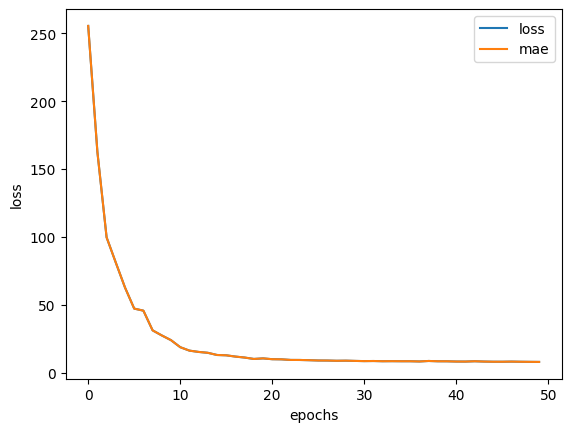

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")



---



# **Feature selection**

In [ ]:
# create X and y

X=data_encoded.drop(['Usage_kWh'],axis=1)
y = data_encoded['Usage_kWh']

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i).round(1) for i in range(X.shape[1])]

    return(vif)

calc_vif(X)

variables   VIF
0  Lagging_Current_Reactive.Power_kVarh   9.3
1  Leading_Current_Reactive_Power_kVarh   7.9
2                             CO2(tCO2)  12.4
3          Lagging_Current_Power_Factor  39.3
4          Leading_Current_Power_Factor  19.5
5                                   NSM   7.3
6                    WeekStatus_Weekend   1.7
7                Load_Type_Maximum_Load   2.8
8                 Load_Type_Medium_Load   3.3

In [ ]:
calc_vif(X.drop(['Lagging_Current_Power_Factor'], axis=1))

variables   VIF
0  Lagging_Current_Reactive.Power_kVarh   8.9
1  Leading_Current_Reactive_Power_kVarh   2.6
2                             CO2(tCO2)  10.5
3          Leading_Current_Power_Factor   4.1
4                                   NSM   6.6
5                    WeekStatus_Weekend   1.6
6                Load_Type_Maximum_Load   2.8
7                 Load_Type_Medium_Load   3.3

In [ ]:
calc_vif(X.drop(['Lagging_Current_Power_Factor','CO2(tCO2)'], axis=1))

variables  VIF
0  Lagging_Current_Reactive.Power_kVarh  2.6
1  Leading_Current_Reactive_Power_kVarh  2.4
2          Leading_Current_Power_Factor  3.9
3                                   NSM  6.6
4                    WeekStatus_Weekend  1.6
5                Load_Type_Maximum_Load  2.2
6                 Load_Type_Medium_Load  2.6

In [ ]:
#9 variables to 6 varaibles
calc_vif(X.drop(['Lagging_Current_Power_Factor','CO2(tCO2)','NSM'], axis=1))

variables  VIF
0  Lagging_Current_Reactive.Power_kVarh  2.6
1  Leading_Current_Reactive_Power_kVarh  1.8
2          Leading_Current_Power_Factor  2.8
3                    WeekStatus_Weekend  1.6
4                Load_Type_Maximum_Load  1.8
5                 Load_Type_Medium_Load  2.0

In [ ]:
#before feature selection
import statsmodels.api as sm


# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Fit the OLS model with updated X_nomulti
model = sm.OLS(y, X).fit()

# Print the summary to get p-values
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.946e+05
Date:                Thu, 19 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:36:31   Log-Likelihood:            -1.0382e+05
No. Observations:               35040   AIC:                         2.077e+05
Df Residuals:                   35030   BIC:                         2.077e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [ ]:
#new X
X_new = X.drop(['Lagging_Current_Power_Factor','CO2(tCO2)','NSM'], axis=1)

In [ ]:
#after feature selection
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
# Verify the columns in X_nomulti
print("Columns in X_new:", X_new.columns)

# Add a constant to the model (intercept term)
X_new = sm.add_constant(X_new)

# Fit the OLS model with updated X_nomulti
model = sm.OLS(y, X_new).fit()

# Print the summary to get p-values
print(model.summary())

Columns in X_new: Index(['const', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'Leading_Current_Power_Factor',
       'WeekStatus_Weekend', 'Load_Type_Maximum_Load',
       'Load_Type_Medium_Load'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                 3.980e+04
Date:                Thu, 19 Dec 2024   Prob (F-statistic):               0.00
Time:                        14:36:31   Log-Likelihood:            -1.3668e+05
No. Observations:               35040   AIC:                         2.734e+05
Df Residuals:                   35033   BIC:                         2.734e+05
Df Model:                           6                                         
Covariance Type:          



---



# Splliting the dataset after the feature selection

In [ ]:
from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_new, y, test_size=0.30, train_size=0.70, random_state=1)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_new, y, test_size=0.20, train_size=0.80, random_state=1)
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_new, y, test_size=0.40, train_size=0.60, random_state=1)
X_train8, X_test8, y_train8, y_test8 = train_test_split(X_new, y, test_size=0.25, train_size=0.75, random_state=1)

# Linear regression

70 - 30 ratio

In [ ]:
# imports
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train5, y_train5)
y_pred5 = lm2.predict(X_test5)
print(np.sqrt(metrics.mean_absolute_error(y_test5, y_pred5)))

2.9163420340801527


In [ ]:
#evaluarion metric
from sklearn.metrics import r2_score
r2_score(y_test5,y_pred5)

0.8694484264244446

60 - 40 ratio

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train7, y_train7)
y_pred7 = lm2.predict(X_test7)
print(np.sqrt(metrics.mean_absolute_error(y_test7, y_pred7)))

2.914043381622628


In [ ]:
#evaluarion metric
from sklearn.metrics import r2_score
r2_score(y_test7,y_pred7)

0.8701424845535009

80 - 20 ratio

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train6, y_train6)
y_pred6 = lm2.predict(X_test6)
print(np.sqrt(metrics.mean_absolute_error(y_test6, y_pred6)))

2.9065329525387167


In [ ]:
#evaluarion metric
from sklearn.metrics import r2_score
r2_score(y_test6,y_pred6)

0.8720706908535956

75 - 25 ratio

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train8, y_train8)
y_pred8 = lm2.predict(X_test8)
print(np.sqrt(metrics.mean_absolute_error(y_test8, y_pred8)))

2.9042282413552467


In [ ]:
#evaluarion metric
from sklearn.metrics import r2_score
r2_score(y_test8,y_pred8)

0.8723748429627062



---



# **KNN after feature selection**



70-30 split

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train5,y_train5)

KNeighborsRegressor()

In [ ]:
y_pred5 = model.predict(X_test5)
y_pred5

array([3.262, 3.802, 3.032, ..., 3.328, 4.946, 5.228])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred5,'Actual':y_test5})
knn

Predicted  Actual
5760       3.262    3.20
14294      3.802    3.78
35035      3.032    3.85
30292     57.562   43.81
31651     57.238   65.34
...          ...     ...
32301     51.356   58.10
10215     61.210   62.24
7005       3.328    3.96
10638      4.946    4.90
22794      5.228    5.33

[10512 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test5,y_pred5)

0.9006333520635277

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test5,y_pred5)

5.2645277777777775

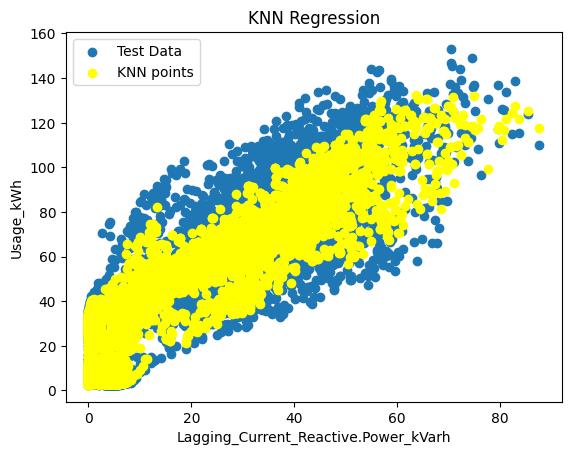

In [ ]:
plt.scatter(X_test5['Lagging_Current_Reactive.Power_kVarh'], y_test5, label='Test Data')
plt.scatter(X_test5['Lagging_Current_Reactive.Power_kVarh'], y_pred5, color='yellow', linewidth=1, label='KNN points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('KNN Regression')
plt.legend()
plt.show()

80-20 split

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train6,y_train6)

KNeighborsRegressor()

In [ ]:
y_pred6 = model.predict(X_test6)
y_pred6

array([ 3.242,  3.802,  3.118, ...,  3.526, 58.24 ,  3.424])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred6,'Actual':y_test6})
knn

Predicted  Actual
5760       3.242    3.20
14294      3.802    3.78
35035      3.118    3.85
30292     60.348   43.81
31651     64.870   65.34
...          ...     ...
6873      80.720   96.62
25118     52.712   40.61
6907       3.526    3.85
6185      58.240   60.80
27936      3.424    3.60

[7008 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test6,y_pred6)

0.9046230645874187

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test6,y_pred6)

5.150785102739726

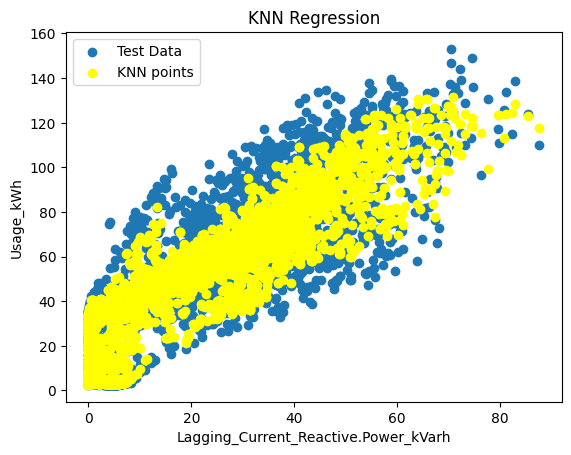

In [ ]:
plt.scatter(X_test6['Lagging_Current_Reactive.Power_kVarh'], y_test6, label='Test Data')
plt.scatter(X_test6['Lagging_Current_Reactive.Power_kVarh'], y_pred6, color='yellow', linewidth=1, label='KNN points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('KNN Regression')
plt.legend()
plt.show()

60-40 split

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train7,y_train7)

KNeighborsRegressor()

In [ ]:
y_pred7 = model.predict(X_test7)
y_pred7

array([3.32 , 3.802, 4.056, ..., 3.166, 4.794, 3.504])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred7,'Actual':y_test7})
knn

Predicted  Actual
5760       3.320    3.20
14294      3.802    3.78
35035      4.056    3.85
30292     56.246   43.81
31651     60.608   65.34
...          ...     ...
16680      3.326    3.35
26222      3.836    2.63
14102      3.166    3.17
30001      4.794    4.82
31402      3.504    3.56

[14016 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test7,y_pred7)

0.8992518420045633

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test7,y_pred7)

5.3267604166666676

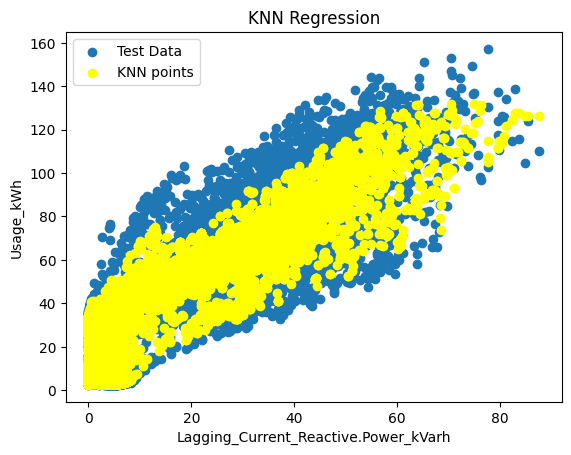

In [ ]:
plt.scatter(X_test7['Lagging_Current_Reactive.Power_kVarh'], y_test7, label='Test Data')
plt.scatter(X_test7['Lagging_Current_Reactive.Power_kVarh'], y_pred7, color='yellow', linewidth=1, label='KNN points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('KNN Regression')
plt.legend()
plt.show()

75-25 split

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train8,y_train8)

KNeighborsRegressor()

In [ ]:
y_pred8=model.predict(X_test8)
y_pred8

array([ 3.298,  3.802,  3.962, ...,  3.298,  3.888, 64.42 ])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred8,'Actual':y_test8})
knn

Predicted  Actual
5760       3.298    3.20
14294      3.802    3.78
35035      3.962    3.85
30292     57.562   43.81
31651     57.238   65.34
...          ...     ...
21676     71.582   75.89
322      117.454  108.29
13257      3.298    3.06
33596      3.888    4.82
2170      64.420   63.68

[8760 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test8,y_pred8)

0.902959242538204

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test8,y_pred8)

5.193614155251141

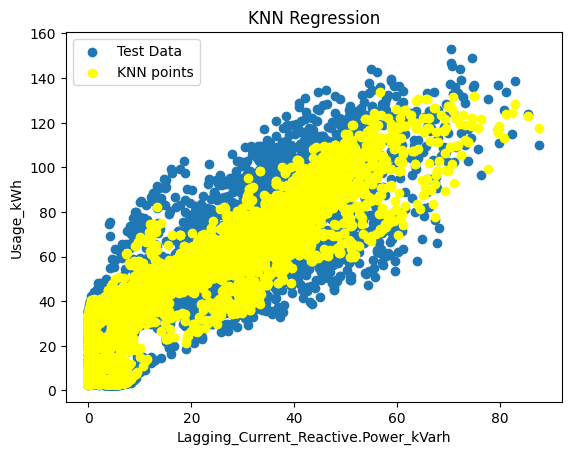

In [ ]:
plt.scatter(X_test8['Lagging_Current_Reactive.Power_kVarh'], y_test8, label='Test Data')
plt.scatter(X_test8['Lagging_Current_Reactive.Power_kVarh'], y_pred8, color='yellow', linewidth=1, label='KNN points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('KNN Regression')
plt.legend()
plt.show()



---



# SVM

70 - 30 ratio

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='rbf')

In [ ]:
model.fit(X_train5, y_train5)

SVR()

In [ ]:
y_pred5 = model.predict(X_test5)
y_pred5

array([0.10283271, 3.77221092, 4.86192298, ..., 6.77954714, 4.86543221,
       5.3868187 ])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred5,'Actual':y_test5})
svm

Predicted  Actual
5760    0.102833    3.20
14294   3.772211    3.78
35035   4.861923    3.85
30292  47.223809   43.81
31651  57.802355   65.34
...          ...     ...
32301  45.217879   58.10
10215  52.743828   62.24
7005    6.779547    3.96
10638   4.865432    4.90
22794   5.386819    5.33

[10512 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test5,y_pred5)

0.8123146708209631

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test5,y_pred5)

8.30750189317793

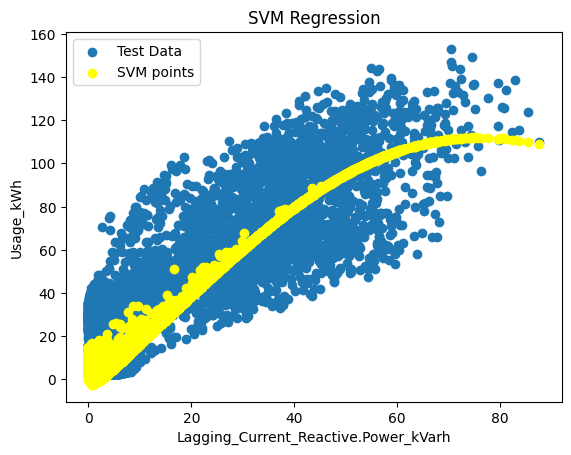

In [ ]:
plt.scatter(X_test5['Lagging_Current_Reactive.Power_kVarh'], y_test5, label='Test Data')
plt.scatter(X_test5['Lagging_Current_Reactive.Power_kVarh'], y_pred5, color='yellow', linewidth=1, label='SVM points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('SVM Regression')
plt.legend()
plt.show()

60 - 40 split

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='rbf')

In [ ]:
model.fit(X_train7, y_train7)

SVR()

In [ ]:
y_pred7 = model.predict(X_test7)
y_pred7

array([0.12952208, 3.76760552, 4.87564549, ..., 3.10930979, 4.76958189,
       0.49019302])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred7,'Actual':y_test7})
svm

Predicted  Actual
5760    0.129522    3.20
14294   3.767606    3.78
35035   4.875645    3.85
30292  46.595964   43.81
31651  57.563127   65.34
...          ...     ...
16680   3.382707    3.35
26222   5.341564    2.63
14102   3.109310    3.17
30001   4.769582    4.82
31402   0.490193    3.56

[14016 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test7,y_pred7)

0.811764370717974

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test7,y_pred7)

8.32390736792661

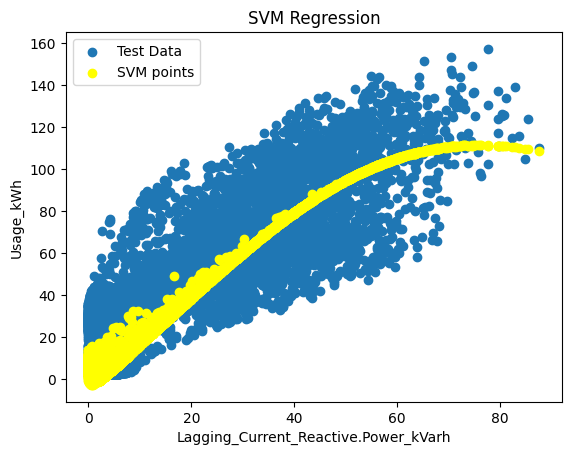

In [ ]:
plt.scatter(X_test7['Lagging_Current_Reactive.Power_kVarh'], y_test7, label='Test Data')
plt.scatter(X_test7['Lagging_Current_Reactive.Power_kVarh'], y_pred7, color='yellow', linewidth=1, label='SVM points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('SVM Regression')
plt.legend()
plt.show()

80 - 20 split

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='rbf')

In [ ]:
model.fit(X_train6, y_train6)

SVR()

In [ ]:
y_pred6 = model.predict(X_test6)
y_pred6

array([ 0.05942207,  3.77264301,  4.84077305, ...,  5.34438722,
       39.93995396,  8.85990312])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred6,'Actual':y_test6})
svm

Predicted  Actual
5760    0.059422    3.20
14294   3.772643    3.78
35035   4.840773    3.85
30292  47.766633   43.81
31651  57.956807   65.34
...          ...     ...
6873   98.390324   96.62
25118  35.018194   40.61
6907    5.344387    3.85
6185   39.939954   60.80
27936   8.859903    3.60

[7008 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test6,y_pred6)

0.814526326751953

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test6,y_pred6)

8.256861581691554

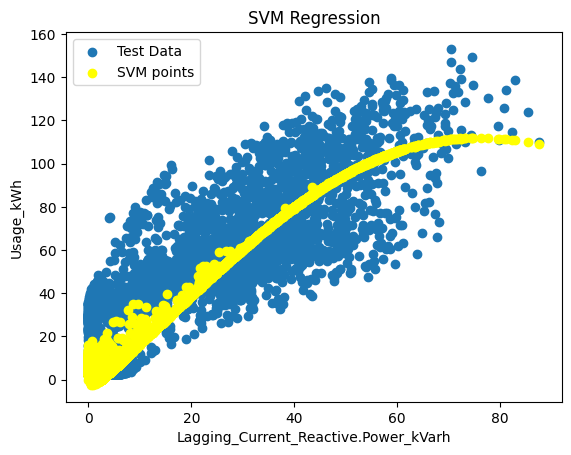

In [ ]:
plt.scatter(X_test6['Lagging_Current_Reactive.Power_kVarh'], y_test6, label='Test Data')
plt.scatter(X_test6['Lagging_Current_Reactive.Power_kVarh'], y_pred6, color='yellow', linewidth=1, label='SVM points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('SVM Regression')
plt.legend()
plt.show()

75 - 25 split

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='rbf')

In [ ]:
model.fit(X_train8, y_train8)

SVR()

In [ ]:
y_pred8 = model.predict(X_test8)
y_pred8

array([ 0.09672023,  3.77346954,  4.86461504, ...,  5.49754245,
        1.52503614, 41.21934996])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred8,'Actual':y_test8})
svm

Predicted  Actual
5760     0.096720    3.20
14294    3.773470    3.78
35035    4.864615    3.85
30292   47.500844   43.81
31651   57.853762   65.34
...           ...     ...
21676   54.105167   75.89
322    111.687158  108.29
13257    5.497542    3.06
33596    1.525036    4.82
2170    41.219350   63.68

[8760 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test8,y_pred8)

0.8167019758553696

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test8,y_pred8)

8.235842744379925

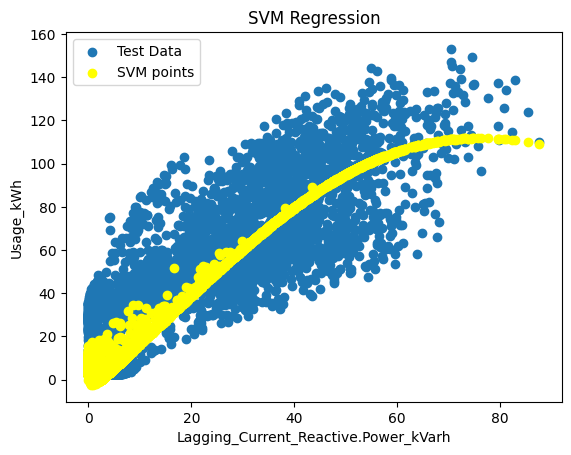

In [ ]:
plt.scatter(X_test8['Lagging_Current_Reactive.Power_kVarh'], y_test8, label='Test Data')
plt.scatter(X_test8['Lagging_Current_Reactive.Power_kVarh'], y_pred8, color='yellow', linewidth=1, label='SVM points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('SVM Regression')
plt.legend()
plt.show()



---



# Decision tree

70 - 30 ratio

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [ ]:
clf = DecisionTreeRegressor()

# Train Decision Tree Classifer
clf = clf.fit(X_train5,y_train5)

In [ ]:
y_pred5 = clf.predict(X_test5)
y_pred5

array([3.256     , 3.71      , 3.39120879, ..., 3.43537037, 4.97      ,
       5.33      ])

In [ ]:
dr = pd.DataFrame({'Predicted':y_pred5,'Actual':y_test5})
dr

Predicted  Actual
5760    3.256000    3.20
14294   3.710000    3.78
35035   3.391209    3.85
30292  49.640000   43.81
31651  61.291429   65.34
...          ...     ...
32301  52.955000   58.10
10215  57.620000   62.24
7005    3.435370    3.96
10638   4.970000    4.90
22794   5.330000    5.33

[10512 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test5,y_pred5)

0.8701169840900379

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test5,y_pred5)

5.665313907898717

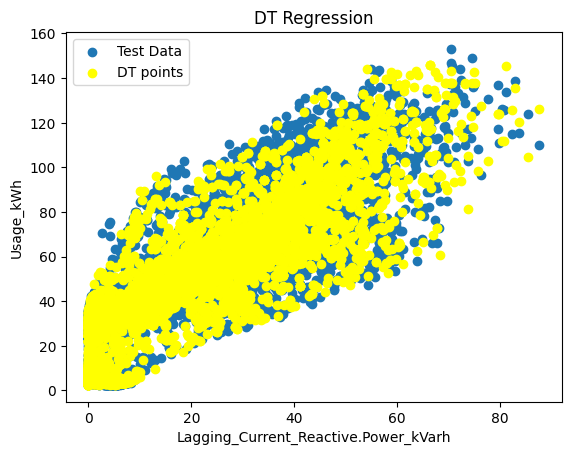

In [ ]:
plt.scatter(X_test5['Lagging_Current_Reactive.Power_kVarh'], y_test5, label='Test Data')
plt.scatter(X_test5['Lagging_Current_Reactive.Power_kVarh'], y_pred5, color='yellow', linewidth=1, label='DT points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('DT Regression')
plt.legend()
plt.show()

60 - 40 ratio

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [ ]:
clf = DecisionTreeRegressor()

# Train Decision Tree Classifer
clf = clf.fit(X_train7,y_train7)

In [ ]:
y_pred7 = clf.predict(X_test7)
y_pred7

array([3.26222222, 3.71      , 3.43246914, ..., 3.17      , 4.86      ,
       3.56      ])

In [ ]:
dr = pd.DataFrame({'Predicted':y_pred7,'Actual':y_test7})
dr

Predicted  Actual
5760    3.262222    3.20
14294   3.710000    3.78
35035   3.432469    3.85
30292  49.640000   43.81
31651  59.603333   65.34
...          ...     ...
16680   3.380000    3.35
26222   3.391282    2.63
14102   3.170000    3.17
30001   4.860000    4.82
31402   3.560000    3.56

[14016 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test7,y_pred7)

0.8685926500807595

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test7,y_pred7)

5.721141216143777

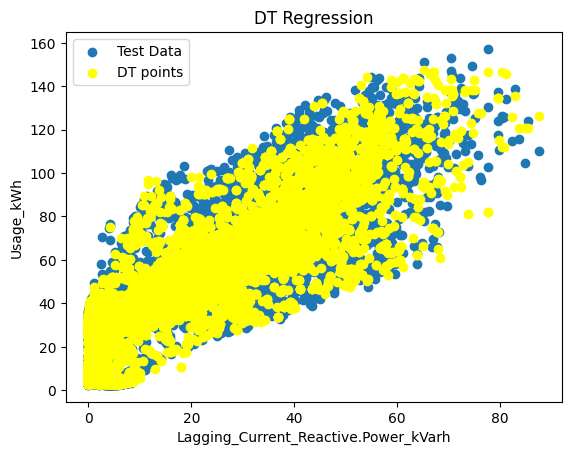

In [ ]:
plt.scatter(X_test7['Lagging_Current_Reactive.Power_kVarh'], y_test7, label='Test Data')
plt.scatter(X_test7['Lagging_Current_Reactive.Power_kVarh'], y_pred7, color='yellow', linewidth=1, label='DT points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('DT Regression')
plt.legend()
plt.show()

80 - 20 ratio

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
clf = DecisionTreeRegressor()

# Train Decision Tree Classifer
clf = clf.fit(X_train6,y_train6)

In [ ]:
y_pred6 = clf.predict(X_test6)
y_pred6

array([ 3.256     ,  3.78      ,  3.40594059, ...,  3.39555556,
       58.24      ,  3.71916667])

In [ ]:
dr = pd.DataFrame({'Predicted':y_pred6,'Actual':y_test6})
dr

Predicted  Actual
5760    3.256000    3.20
14294   3.780000    3.78
35035   3.405941    3.85
30292  51.260000   43.81
31651  61.291429   65.34
...          ...     ...
6873   63.400000   96.62
25118  48.170000   40.61
6907    3.395556    3.85
6185   58.240000   60.80
27936   3.719167    3.60

[7008 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test6,y_pred6)

0.8802860208707395

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test6,y_pred6)

5.429870266806992

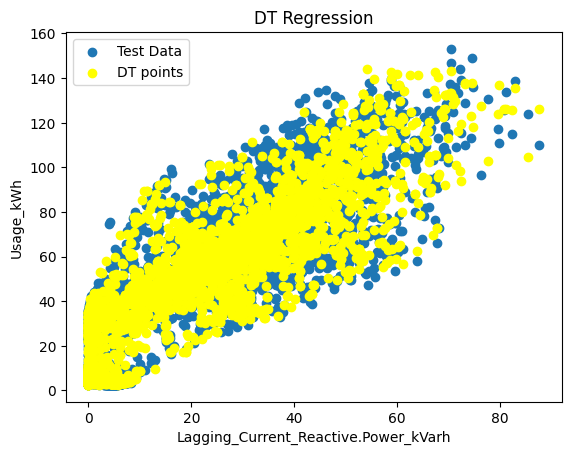

In [ ]:
plt.scatter(X_test6['Lagging_Current_Reactive.Power_kVarh'], y_test6, label='Test Data')
plt.scatter(X_test6['Lagging_Current_Reactive.Power_kVarh'], y_pred6, color='yellow', linewidth=1, label='DT points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('DT Regression')
plt.legend()
plt.show()

75 - 25 ratio

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
clf = DecisionTreeRegressor()

# Train Decision Tree Classifer
clf = clf.fit(X_train8,y_train8)

In [ ]:
y_pred8 = clf.predict(X_test8)
y_pred8

array([ 3.256     ,  3.78      ,  3.4209375 , ...,  3.07594595,
        4.        , 44.93      ])

In [ ]:
dr = pd.DataFrame({'Predicted':y_pred8,'Actual':y_test8})
dr

Predicted  Actual
5760    3.256000    3.20
14294   3.780000    3.78
35035   3.420937    3.85
30292  51.260000   43.81
31651  61.291429   65.34
...          ...     ...
21676  73.592500   75.89
322    98.320000  108.29
13257   3.075946    3.06
33596   4.000000    4.82
2170   44.930000   63.68

[8760 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test8,y_pred8)

0.8763547329482408

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test8,y_pred8)

5.5140974154602285

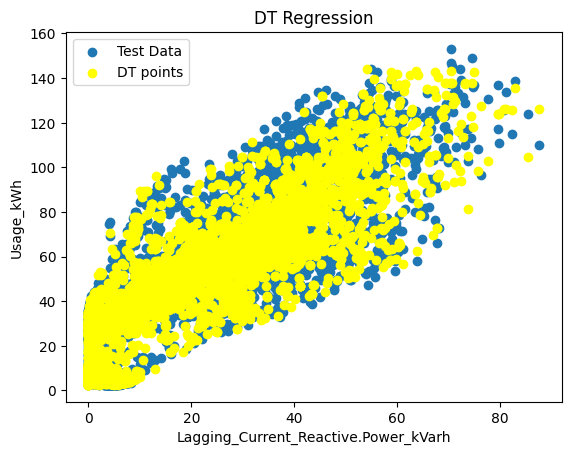

In [ ]:
plt.scatter(X_test8['Lagging_Current_Reactive.Power_kVarh'], y_test8, label='Test Data')
plt.scatter(X_test8['Lagging_Current_Reactive.Power_kVarh'], y_pred8, color='yellow', linewidth=1, label='DT points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('DT Regression')
plt.legend()
plt.show()



---



# Bagging

70 - 30 ratio

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train5, y_train5)

RandomForestRegressor()

In [ ]:
y_pred5 = rf.predict(X_test5)
y_pred5

array([3.24979424, 3.7747    , 3.39053388, ..., 3.43752481, 4.9456    ,
       5.458     ])

In [ ]:
r = pd.DataFrame({'Predicted':y_pred5,'Actual':y_test5})
r

Predicted  Actual
5760    3.249794    3.20
14294   3.774700    3.78
35035   3.390534    3.85
30292  52.509950   43.81
31651  61.068560   65.34
...          ...     ...
32301  53.124018   58.10
10215  59.853981   62.24
7005    3.437525    3.96
10638   4.945600    4.90
22794   5.458000    5.33

[10512 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test5,y_pred5)

0.8959604066977229

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test5,y_pred5)

5.1668571208110095

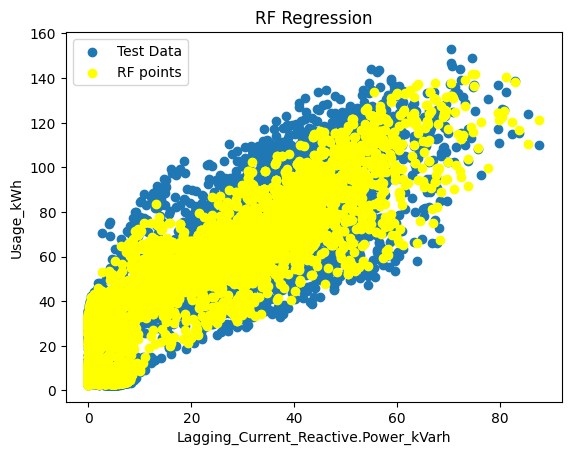

In [ ]:
plt.scatter(X_test5['Lagging_Current_Reactive.Power_kVarh'], y_test5, label='Test Data')
plt.scatter(X_test5['Lagging_Current_Reactive.Power_kVarh'], y_pred5, color='yellow', linewidth=1, label='RF points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('RF Regression')
plt.legend()
plt.show()

60 - 40 ratio

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train7, y_train7)

RandomForestRegressor()

In [ ]:
y_pred7 = rf.predict(X_test7)
y_pred7

array([3.25237369, 3.7621    , 3.44612348, ..., 3.1705    , 4.8081    ,
       3.659     ])

In [ ]:
r = pd.DataFrame({'Predicted':y_pred7,'Actual':y_test7})
r

Predicted  Actual
5760    3.252374    3.20
14294   3.762100    3.78
35035   3.446123    3.85
30292  52.367700   43.81
31651  59.095708   65.34
...          ...     ...
16680   3.325500    3.35
26222   3.398261    2.63
14102   3.170500    3.17
30001   4.808100    4.82
31402   3.659000    3.56

[14016 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test7,y_pred7)

0.894934778876749

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test7,y_pred7)

5.231082729638399

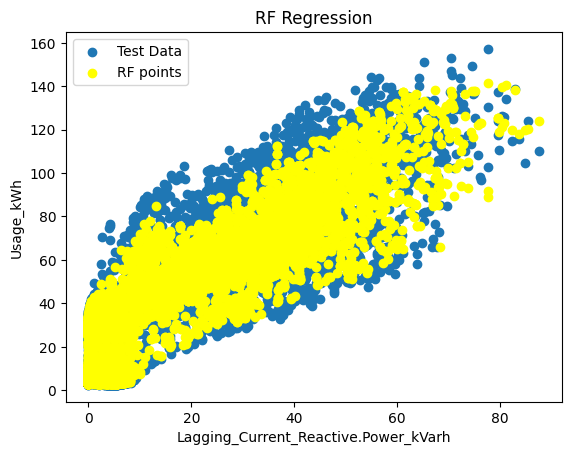

In [ ]:
plt.scatter(X_test7['Lagging_Current_Reactive.Power_kVarh'], y_test7, label='Test Data')
plt.scatter(X_test7['Lagging_Current_Reactive.Power_kVarh'], y_pred7, color='yellow', linewidth=1, label='RF points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('RF Regression')
plt.legend()
plt.show()

80- 20 ratio

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train6, y_train6)

RandomForestRegressor()

In [ ]:
y_pred6 = rf.predict(X_test6)
y_pred6

array([ 3.24765562,  3.7577    ,  3.41067748, ...,  3.42420728,
       58.71568125,  3.7108267 ])

In [ ]:
r = pd.DataFrame({'Predicted':y_pred6,'Actual':y_test6})
r

Predicted  Actual
5760    3.247656    3.20
14294   3.757700    3.78
35035   3.410677    3.85
30292  53.410700   43.81
31651  61.545338   65.34
...          ...     ...
6873   76.919200   96.62
25118  48.808483   40.61
6907    3.424207    3.85
6185   58.715681   60.80
27936   3.710827    3.60

[7008 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test6,y_pred6)

0.9026118478354235

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test6,y_pred6)

4.994361289432745

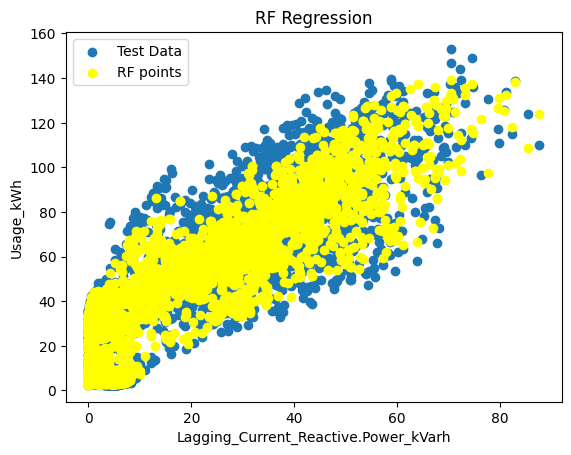

In [ ]:
plt.scatter(X_test6['Lagging_Current_Reactive.Power_kVarh'], y_test6, label='Test Data')
plt.scatter(X_test6['Lagging_Current_Reactive.Power_kVarh'], y_pred6, color='yellow', linewidth=1, label='RF points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('RF Regression')
plt.legend()
plt.show()

75 - 25 ratio

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train8, y_train8)

RandomForestRegressor()

In [ ]:
y_pred8 = rf.predict(X_test8)
y_pred8

array([ 3.26613383,  3.7599    ,  3.41234241, ...,  3.06734563,
        3.9652    , 54.22555   ])

In [ ]:
r = pd.DataFrame({'Predicted':y_pred8,'Actual':y_test8})
r

Predicted  Actual
5760     3.266134    3.20
14294    3.759900    3.78
35035    3.412342    3.85
30292   52.633400   43.81
31651   61.371438   65.34
...           ...     ...
21676   75.915918   75.89
322    109.170200  108.29
13257    3.067346    3.06
33596    3.965200    4.82
2170    54.225550   63.68

[8760 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test8,y_pred8)

0.8992935059345559

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test8,y_pred8)

5.078579958391854

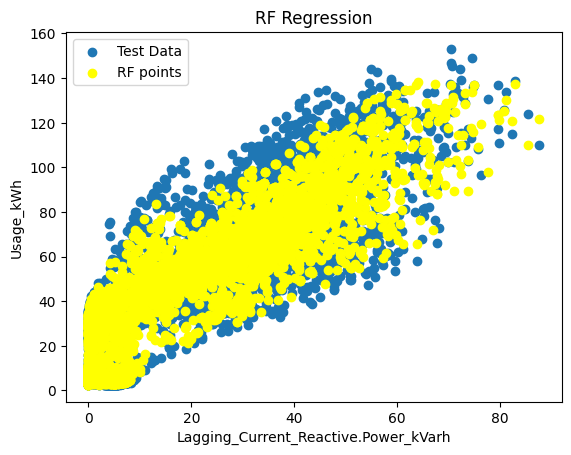

In [ ]:
plt.scatter(X_test8['Lagging_Current_Reactive.Power_kVarh'], y_test8, label='Test Data')
plt.scatter(X_test8['Lagging_Current_Reactive.Power_kVarh'], y_pred8, color='yellow', linewidth=1, label='RF points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('RF Regression')
plt.legend()
plt.show()



---



# Boosting

**XG boost**

70 - 30 ratio

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBRegressor()

model = model.fit(X_train5, y_train5)

In [ ]:
y_pred5 = model.predict(X_test5)
y_pred5

array([3.3600142, 3.933755 , 3.3906765, ..., 3.4818437, 4.7269845,
       5.294252 ], dtype=float32)

In [ ]:
xg = pd.DataFrame({'Predicted':y_pred5,'Actual':y_test5})
xg

Predicted  Actual
5760    3.360014    3.20
14294   3.933755    3.78
35035   3.390676    3.85
30292  47.882900   43.81
31651  65.417198   65.34
...          ...     ...
32301  53.362923   58.10
10215  63.515663   62.24
7005    3.481844    3.96
10638   4.726985    4.90
22794   5.294252    5.33

[10512 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test5,y_pred5)

0.9170633647513731

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test5,y_pred5)

4.748406217171947

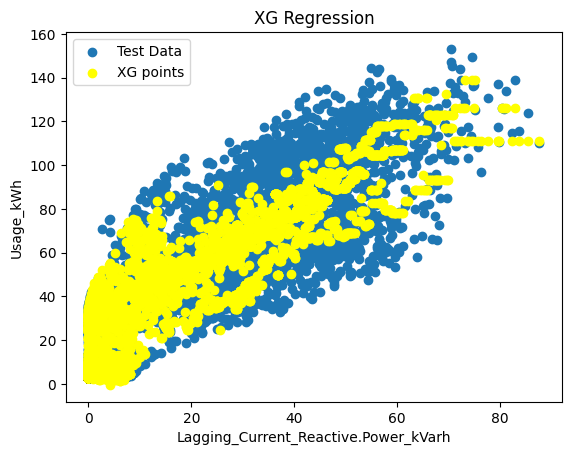

In [ ]:
plt.scatter(X_test5['Lagging_Current_Reactive.Power_kVarh'], y_test5, label='Test Data')
plt.scatter(X_test5['Lagging_Current_Reactive.Power_kVarh'], y_pred5, color='yellow', linewidth=1, label='XG points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('XG Regression')
plt.legend()
plt.show()

60 - 40 ratio

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBRegressor()

model = model.fit(X_train7, y_train7)

In [ ]:
y_pred7 = model.predict(X_test7)
y_pred7

array([3.3987207, 3.9571786, 3.3945403, ..., 3.195972 , 4.9141994,
       3.7927153], dtype=float32)

In [ ]:
xg = pd.DataFrame({'Predicted':y_pred7,'Actual':y_test7})
xg

Predicted  Actual
5760    3.398721    3.20
14294   3.957179    3.78
35035   3.394540    3.85
30292  45.714417   43.81
31651  73.010727   65.34
...          ...     ...
16680   2.869868    3.35
26222   3.446807    2.63
14102   3.195972    3.17
30001   4.914199    4.82
31402   3.792715    3.56

[14016 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test7,y_pred7)

0.9178598108147847

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test7,y_pred7)

4.721139162685382

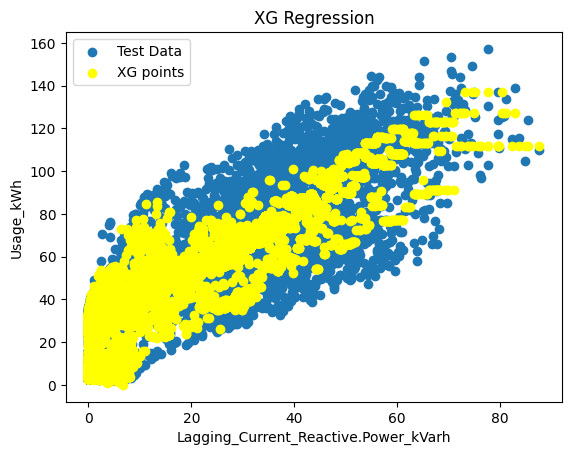

In [ ]:
plt.scatter(X_test7['Lagging_Current_Reactive.Power_kVarh'], y_test7, label='Test Data')
plt.scatter(X_test7['Lagging_Current_Reactive.Power_kVarh'], y_pred7, color='yellow', linewidth=1, label='XG points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('XG Regression')
plt.legend()
plt.show()

80 - 20 ratio

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBRegressor()

model = model.fit(X_train6, y_train6)

In [ ]:
y_pred6 = model.predict(X_test6)
y_pred6

array([ 3.4316764,  3.7761664,  3.4082875, ...,  4.283041 , 54.300068 ,
        3.8777864], dtype=float32)

In [ ]:
xg = pd.DataFrame({'Predicted':y_pred6,'Actual':y_test6})
xg

Predicted  Actual
5760    3.431676    3.20
14294   3.776166    3.78
35035   3.408288    3.85
30292  48.212303   43.81
31651  69.295815   65.34
...          ...     ...
6873   94.504456   96.62
25118  53.254082   40.61
6907    4.283041    3.85
6185   54.300068   60.80
27936   3.877786    3.60

[7008 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test6,y_pred6)

0.9205703875280891

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test6,y_pred6)

4.652240236873088

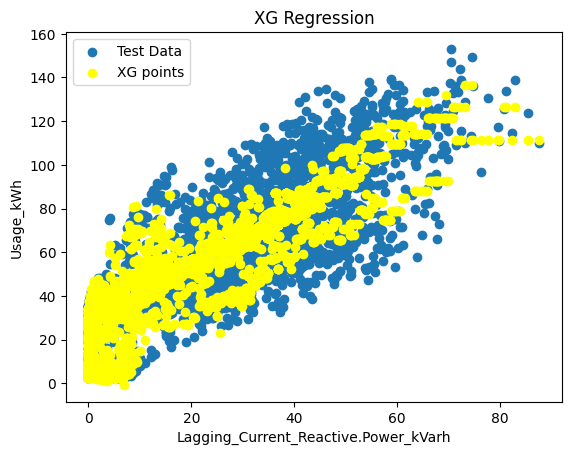

In [ ]:
plt.scatter(X_test6['Lagging_Current_Reactive.Power_kVarh'], y_test6, label='Test Data')
plt.scatter(X_test6['Lagging_Current_Reactive.Power_kVarh'], y_pred6, color='yellow', linewidth=1, label='XG points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('XG Regression')
plt.legend()
plt.show()

75 - 25 ratio

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBRegressor()

model = model.fit(X_train8, y_train8)

In [ ]:
y_pred8 = model.predict(X_test8)
y_pred8

array([ 3.412338 ,  3.9208012,  3.3881812, ...,  3.2562447,  3.758292 ,
       54.290802 ], dtype=float32)

In [ ]:
xg = pd.DataFrame({'Predicted':y_pred8,'Actual':y_test8})
xg

Predicted  Actual
5760     3.412338    3.20
14294    3.920801    3.78
35035    3.388181    3.85
30292   49.756302   43.81
31651   67.307793   65.34
...           ...     ...
21676   65.564606   75.89
322    110.939171  108.29
13257    3.256245    3.06
33596    3.758292    4.82
2170    54.290802   63.68

[8760 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test8,y_pred8)

0.919567045932886

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test8,y_pred8)

4.674384000708524

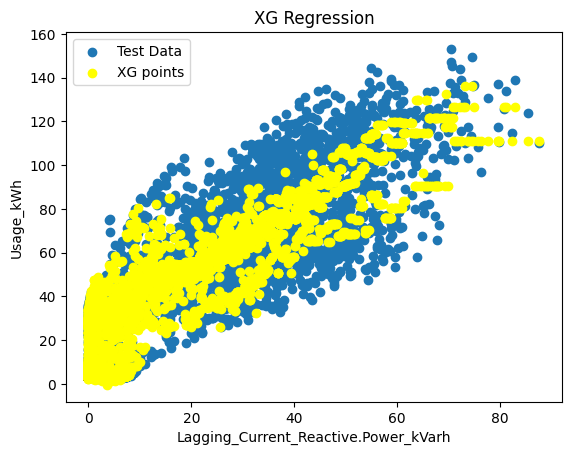

In [ ]:
plt.scatter(X_test8['Lagging_Current_Reactive.Power_kVarh'], y_test8, label='Test Data')
plt.scatter(X_test8['Lagging_Current_Reactive.Power_kVarh'], y_pred8, color='yellow', linewidth=1, label='XG points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('XG Regression')
plt.legend()
plt.show()

# **ada boost**

70 - 30 ratio

In [ ]:
from sklearn.ensemble import AdaBoostRegressor


# Initialize the AdaBoost classifier
model = AdaBoostRegressor(n_estimators=50, random_state=42)

# Fit the model on the training data
model.fit(X_train5, y_train5)

# Predict on the test data
y_pred5 = model.predict(X_test5)

In [ ]:
ab = pd.DataFrame({'Predicted':y_pred5,'Actual':y_test5})
ab

Predicted  Actual
5760    7.345651    3.20
14294  11.423779    3.78
35035   7.345651    3.85
30292  58.091818   43.81
31651  68.819136   65.34
...          ...     ...
32301  61.542246   58.10
10215  65.824045   62.24
7005    7.345651    3.96
10638  11.423779    4.90
22794  13.766585    5.33

[10512 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test5,y_pred5)

0.8683736264348549

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test5,y_pred5)

9.175096507461362

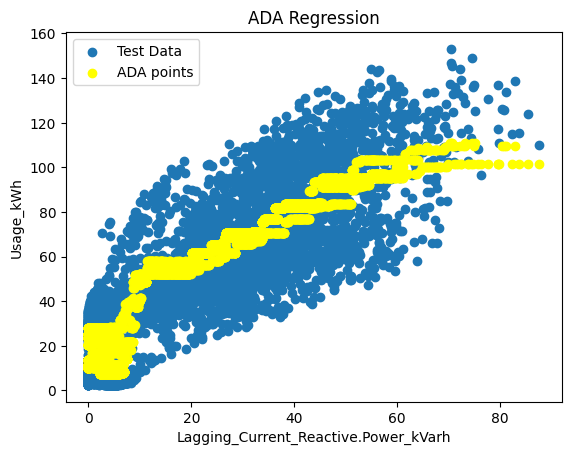

In [ ]:
plt.scatter(X_test5['Lagging_Current_Reactive.Power_kVarh'], y_test5, label='Test Data')
plt.scatter(X_test5['Lagging_Current_Reactive.Power_kVarh'], y_pred5, color='yellow', linewidth=1, label='ADA points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('ADA Regression')
plt.legend()
plt.show()

60 - 40 ratio

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize the AdaBoost classifier
model = AdaBoostRegressor(n_estimators=50, random_state=42)

# Fit the model on the training data
model.fit(X_train7, y_train7)

# Predict on the test data
y_pred7 = model.predict(X_test7)

In [ ]:
ab = pd.DataFrame({'Predicted':y_pred7,'Actual':y_test7})
ab

Predicted  Actual
5760    6.664359    3.20
14294  11.919248    3.78
35035   6.664359    3.85
30292  55.881075   43.81
31651  73.885440   65.34
...          ...     ...
16680  11.919248    3.35
26222   6.664359    2.63
14102  11.919248    3.17
30001  11.919248    4.82
31402  15.735063    3.56

[14016 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test7,y_pred7)

0.8674233134396986

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test7,y_pred7)

9.213788927481797

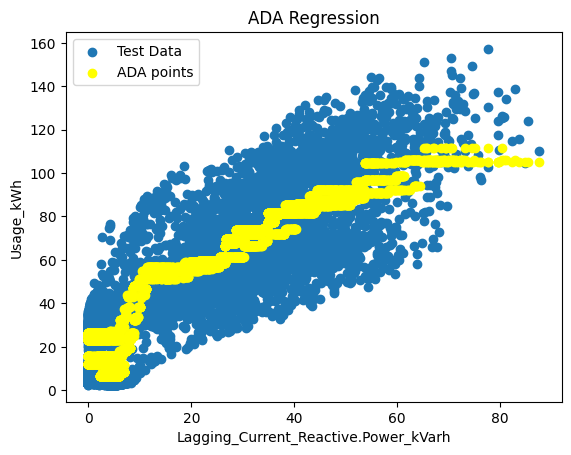

In [ ]:
plt.scatter(X_test7['Lagging_Current_Reactive.Power_kVarh'], y_test7, label='Test Data')
plt.scatter(X_test7['Lagging_Current_Reactive.Power_kVarh'], y_pred7, color='yellow', linewidth=1, label='ADA points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('ADA Regression')
plt.legend()
plt.show()

80 - 20 ratio

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize the AdaBoost classifier
model = AdaBoostRegressor(n_estimators=50, random_state=42)

# Fit the model on the training data
model.fit(X_train6, y_train6)

# Predict on the test data
y_pred6 = model.predict(X_test6)

In [ ]:
ab = pd.DataFrame({'Predicted':y_pred6,'Actual':y_test6})
ab

Predicted  Actual
5760    4.795913    3.20
14294  11.549724    3.78
35035   4.795913    3.85
30292  58.028899   43.81
31651  69.552897   65.34
...          ...     ...
6873   92.349250   96.62
25118  55.926152   40.61
6907   11.549724    3.85
6185   58.563566   60.80
27936   9.312963    3.60

[7008 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test6,y_pred6)

0.8760392539035811

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test6,y_pred6)

8.324685610294672

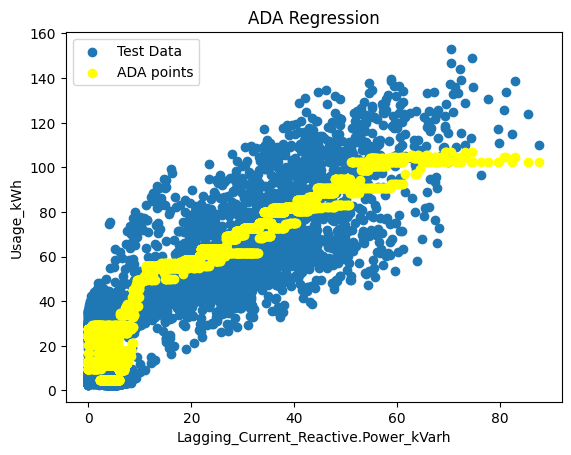

In [ ]:
plt.scatter(X_test6['Lagging_Current_Reactive.Power_kVarh'], y_test6, label='Test Data')
plt.scatter(X_test6['Lagging_Current_Reactive.Power_kVarh'], y_pred6, color='yellow', linewidth=1, label='ADA points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('ADA Regression')
plt.legend()
plt.show()

75 - 25 ratio

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize the AdaBoost classifier
model = AdaBoostRegressor(n_estimators=50, random_state=42)

# Fit the model on the training data
model.fit(X_train8, y_train8)

# Predict on the test data
y_pred8 = model.predict(X_test8)

In [ ]:
ab = pd.DataFrame({'Predicted':y_pred8,'Actual':y_test8})
ab

Predicted  Actual
5760    5.072972    3.20
14294  11.915481    3.78
35035   5.072972    3.85
30292  57.071076   43.81
31651  69.245679   65.34
...          ...     ...
21676  69.245679   75.89
322    99.626406  108.29
13257   5.072972    3.06
33596  19.930471    4.82
2170   54.960127   63.68

[8760 rows x 2 columns]

In [ ]:
#Evaluation Metric
from sklearn.metrics import r2_score
r2_score(y_test8,y_pred8)

0.8752643729140923

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test8,y_pred8)

8.035651089290413

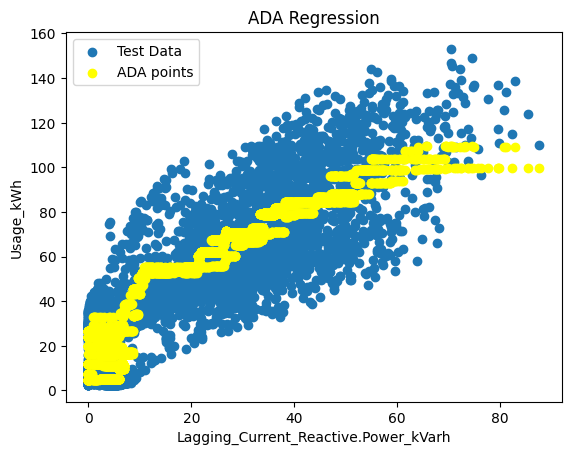

In [ ]:
plt.scatter(X_test8['Lagging_Current_Reactive.Power_kVarh'], y_test8, label='Test Data')
plt.scatter(X_test8['Lagging_Current_Reactive.Power_kVarh'], y_pred8, color='yellow', linewidth=1, label='ADA points')
plt.xlabel('Lagging_Current_Reactive.Power_kVarh')
plt.ylabel('Usage_kWh')
plt.title('ADA Regression')
plt.legend()
plt.show()



---



# ANN

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([




                            tf.keras.layers.Dense(18),

                            tf.keras.layers.Dense(15),


 tf.keras.layers.Dense(12),



                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)

])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train5, y_train5, epochs= 50, verbose=1)

Epoch 1/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 12.3242 - mae: 12.3242
Epoch 2/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.7458 - mae: 8.7458
Epoch 3/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.5078 - mae: 8.5078
Epoch 4/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.3768 - mae: 8.3768
Epoch 5/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.3354 - mae: 8.3354
Epoch 6/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2787 - mae: 8.2787
Epoch 7/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2714 - mae: 8.2714
Epoch 8/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.2469 - mae: 8.2469
Epoch 9/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2337 - mae: 8.2337
Epoch 10/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.2191 - mae: 8.2191
Epoch 11/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.2143 - mae: 8.2143
Epoch 12/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.2061 - mae: 8.2061
Epoch 13/50
767/767 ━━━

In [ ]:
model.evaluate(X_test5, y_test5)

329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.2553 - mae: 8.2553


[8.338384628295898, 8.338384628295898]

In [ ]:
y_pred5 = model.predict(X_test5)
y_pred5 = y_pred5.flatten()

329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test5, y_pred5)
print(f'R² Score: {r2}')

R² Score: 0.8394971436991594


In [ ]:
ann = pd.DataFrame({'Predicted':y_pred5,'Actual':y_test5})
ann

Predicted  Actual
5760    0.395534    3.20
14294  10.610970    3.78
35035   3.791108    3.85
30292  38.607052   43.81
31651  51.985092   65.34
...          ...     ...
32301  48.853722   58.10
10215  48.424965   62.24
7005    5.137374    3.96
10638   9.112476    4.90
22794  16.626112    5.33

[10512 rows x 2 columns]

In [ ]:
model.summary();

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 18)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 15)                  │             285 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 12)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 3)                   │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,174 (8.50 KB)

 Trainable params: 724 (2.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,450 (5.67 KB)

Text(0.5, 0, 'epochs')

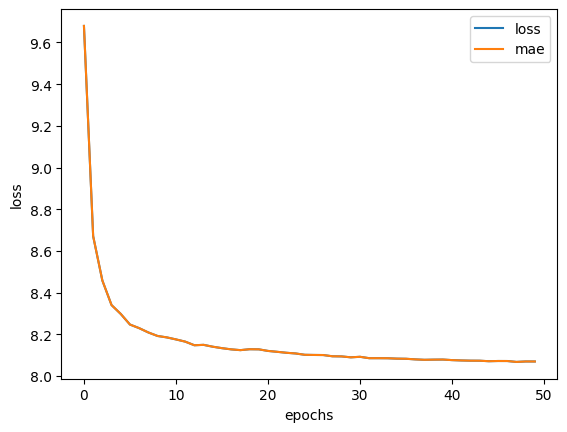

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

80 - 20

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([




                            tf.keras.layers.Dense(18),

                            tf.keras.layers.Dense(15),


 tf.keras.layers.Dense(12),



                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)

])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train6, y_train6, epochs= 50, verbose=1)

Epoch 1/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 13.3298 - mae: 13.3298
Epoch 2/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.6993 - mae: 8.6993
Epoch 3/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.4994 - mae: 8.4994
Epoch 4/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.3612 - mae: 8.3612
Epoch 5/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.3065 - mae: 8.3065
Epoch 6/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.2680 - mae: 8.2680
Epoch 7/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.2449 - mae: 8.2449
Epoch 8/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2267 - mae: 8.2267
Epoch 9/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.2212 - mae: 8.2212
Epoch 10/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.2031 - mae: 8.2031
Epoch 11/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.1881 - mae: 8.1881
Epoch 12/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.1907 - mae: 8.1907
Epoch 13/50
876/876 ━━━

In [ ]:
model.evaluate(X_test6, y_test6)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.1878 - mae: 8.1878


[8.225542068481445, 8.225542068481445]

In [ ]:
y_pred6 = model.predict(X_test6)
y_pred6 = y_pred6.flatten()

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test6, y_pred6)
print(f'R² Score: {r2}')

R² Score: 0.8615270224153841


In [ ]:
ann = pd.DataFrame({'Predicted':y_pred6,'Actual':y_test6})
ann

Predicted  Actual
5760     1.662312    3.20
14294   12.036552    3.78
35035    5.433875    3.85
30292   43.893654   43.81
31651   58.507267   65.34
...           ...     ...
6873   104.009018   96.62
25118   46.887283   40.61
6907    18.847713    3.85
6185    50.542553   60.80
27936    8.540846    3.60

[7008 rows x 2 columns]

In [ ]:
model.summary();

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (32, 18)                    │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (32, 15)                    │             285 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (32, 12)                    │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (32, 6)                     │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (32, 3)                     │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (32, 1)                     │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,174 (8.50 KB)

 Trainable params: 724 (2.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,450 (5.67 KB)

Text(0.5, 0, 'epochs')

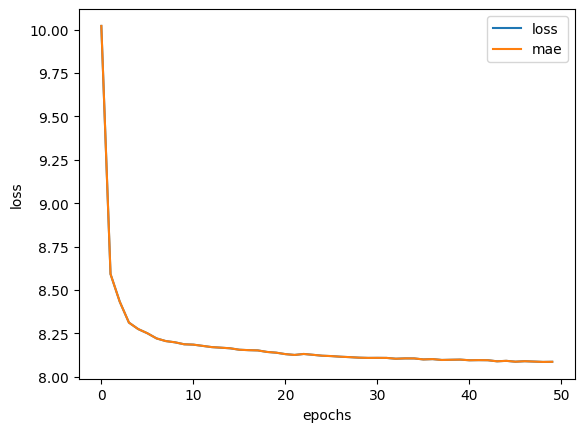

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

60- 40

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([




                            tf.keras.layers.Dense(18),

                            tf.keras.layers.Dense(15),


 tf.keras.layers.Dense(12),



                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)

])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train7, y_train7, epochs= 50, verbose=1)

Epoch 1/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 15.8471 - mae: 15.8471
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.8082 - mae: 8.8082
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.5309 - mae: 8.5309
Epoch 4/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.3594 - mae: 8.3594
Epoch 5/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.3210 - mae: 8.3210
Epoch 6/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2918 - mae: 8.2918
Epoch 7/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2600 - mae: 8.2600
Epoch 8/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.2625 - mae: 8.2625
Epoch 9/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.2372 - mae: 8.2372
Epoch 10/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2380 - mae: 8.2380
Epoch 11/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2249 - mae: 8.2249
Epoch 12/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2163 - mae: 8.2163
Epoch 13/50
657/657 ━━━

In [ ]:
model.evaluate(X_test7, y_test7)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.2443 - mae: 8.2443


[8.273079872131348, 8.273079872131348]

In [ ]:
y_pred7 = model.predict(X_test7)
y_pred7 = y_pred7.flatten()

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test7, y_pred7)
print(f'R² Score: {r2}')

R² Score: 0.8574219038724632


In [ ]:
ann = pd.DataFrame({'Predicted':y_pred7,'Actual':y_test7})
ann

Predicted  Actual
5760    0.513815    3.20
14294  13.569273    3.78
35035   4.440833    3.85
30292  45.144524   43.81
31651  60.140903   65.34
...          ...     ...
16680  17.323761    3.35
26222   4.821424    2.63
14102   2.104172    3.17
30001  13.296350    4.82
31402   1.972926    3.56

[14016 rows x 2 columns]

In [ ]:
model.summary();

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (32, 18)                    │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (32, 15)                    │             285 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (32, 12)                    │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (32, 6)                     │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (32, 3)                     │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (32, 1)                     │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,174 (8.50 KB)

 Trainable params: 724 (2.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,450 (5.67 KB)

Text(0.5, 0, 'epochs')

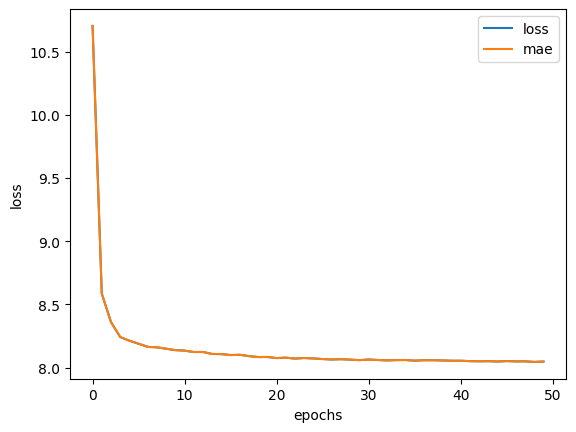

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

75 - 25 ratio

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([




                            tf.keras.layers.Dense(18),

                            tf.keras.layers.Dense(15),


 tf.keras.layers.Dense(12),



                            tf.keras.layers.Dense(6),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)

])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train8, y_train8, epochs= 50, verbose=1)

Epoch 1/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 15.0545 - mae: 15.0545
Epoch 2/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.5751 - mae: 8.5751
Epoch 3/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.4001 - mae: 8.4001
Epoch 4/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2962 - mae: 8.2962
Epoch 5/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2442 - mae: 8.2442
Epoch 6/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.2227 - mae: 8.2227
Epoch 7/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.2180 - mae: 8.2180
Epoch 8/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.2098 - mae: 8.2098
Epoch 9/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 8.2037 - mae: 8.2037
Epoch 10/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.1866 - mae: 8.1866
Epoch 11/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.1842 - mae: 8.1842
Epoch 12/50
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.1889 - mae: 8.1889
Epoch 13/50
822/822 ━━━

In [ ]:
model.evaluate(X_test8, y_test8)

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.0805 - mae: 8.0805


[8.11971664428711, 8.11971664428711]

In [ ]:
y_pred8 = model.predict(X_test8)
y_pred8 = y_pred8.flatten()

274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test8, y_pred8)
print(f'R² Score: {r2}')

R² Score: 0.8523184914460608


In [ ]:
ann = pd.DataFrame({'Predicted':y_pred8,'Actual':y_test8})
ann

Predicted  Actual
5760    -0.090908    3.20
14294   12.198746    3.78
35035    3.515067    3.85
30292   40.658726   43.81
31651   54.454018   65.34
...           ...     ...
21676   51.642307   75.89
322    116.237541  108.29
13257    5.216242    3.06
33596    2.075517    4.82
2170    42.269943   63.68

[8760 rows x 2 columns]

In [ ]:
model.summary();

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 18)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 15)                  │             285 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 12)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 3)                   │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,174 (8.50 KB)

 Trainable params: 724 (2.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,450 (5.67 KB)

Text(0.5, 0, 'epochs')

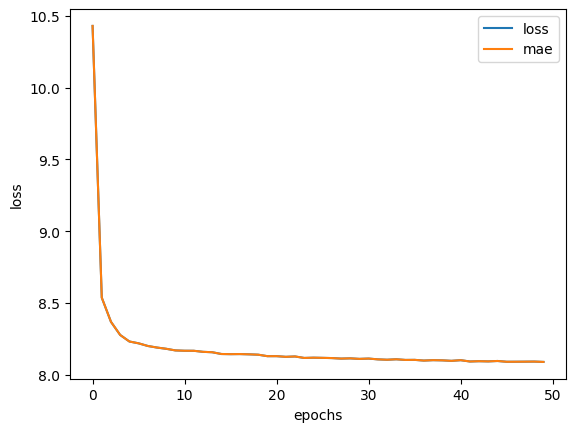

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")



---

